In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import plot_confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
data = pd.read_csv('DDHealth_v3.csv')

### Quick analysis 

In [3]:
data.head()

,ID,pond,ENTREV,DURACION,CCAA,PROV,HAB,SEX,EDAD,EDUC,COB,LIVING,MARITAL,HSIZE,ACTIVITY,FINANCIAL,NCHILD,PCHILD,EDUC_CHILDREN,CONTACT_CHILDREN,INT_USE,INT_DEVICE_1,INT_DEVICE_2,INT_DEVICE_3,INT_DEVICE_95,INT_DEVICE_98,INT_DEVICE_99,INT_DEVICE_TEXT,INT_FREQ,INT_LOCATION_1,INT_LOCATION_2,INT_LOCATION_3,INT_LOCATION_95,INT_LOCATION_98,INT_LOCATION_99,INT_LOCATION_TEXT,INT_MEDICAL3,INT_MEDICAL24,INT_MEDICAL2019,INT_MEDICAL_HELP,INT_MEDICAL_WHO_1,INT_MEDICAL_WHO_2,INT_MEDICAL_WHO_3,INT_MEDICAL_WHO_4,INT_MEDICAL_WHO_95,INT_MEDICAL_WHO_98,INT_MEDICAL_WHO_99,INT_MEDICAL_WHO_TXT,SRH,CHRONIC,LIMIT,LIMIT_TYPE,PAIN,LIMIT4WEEKS,DOCTOR,MEDICAL_EXP,HOSP,SMOKING,HAPPY,LONELINESS,SATISFACTION,SOCIAL_CONTACT,SOCIAL_FAMILY,SOCIAL_PERCEIVED,INT_LIMITATIONS,MED_SUP,MED_SUP_WHO_1,MED_SUP_WHO_2,MED_SUP_WHO_3,MED_SUP_WHO_4,MED_SUP_WHO_95,MED_SUP_WHO_99,MED_SUP_WHO_TEXT,HL1,HL2,HL3,HL4,HL5,HL6,HL7,HL8,HL9,HL10,HL11,HL12,HL13,HL14,HL15,HL16
0,3,0.801296,773,15.066667,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 50 a 64 años,Educación secundaria,Resto del mundo,Conviviendo en pareja,Casado/a,3,Está en paro,Con cierta dificultad,1,"Sí, todos",No contesta,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Muy malo,"Sí, más de uno",Limitado,Físico,Moderado,Sí,Más de 12 meses,Entre 1 y 12 meses,No,No fumo actualmente pero he fumado antes,No contesta,Nunca,No contesta,Nunca,Una vez al mes,Siempre,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Muy fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
1,10,0.876310,920,12.183333,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",No limitado,NaN,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,36,1.194380,773,13.883333,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,No,No,No,-,Cada día,Sí,No,No,No,No,No,-,Sí,Sí,Si regularmente,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Bueno,No,No limitado,NaN,Moderado,No,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Sí,No,No,No,No,No,-,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,41,0.876310,773,15.333333,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",Limitado,Físico,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,42,0.876310,920,18.366667,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,

In [4]:
data.shape

(2011, 89)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2011 non-null   int64  
 1   pond                 2011 non-null   float64
 2   ENTREV               2011 non-null   int64  
 3   DURACION             2011 non-null   float64
 4   CCAA                 2011 non-null   object 
 5   PROV                 2011 non-null   object 
 6   HAB                  2011 non-null   object 
 7   SEX                  2011 non-null   object 
 8   EDAD                 2011 non-null   object 
 9   EDUC                 2011 non-null   object 
 10  COB                  2011 non-null   object 
 11  LIVING               2011 non-null   object 
 12  MARITAL              2011 non-null   object 
 13  HSIZE                2011 non-null   object 
 14  ACTIVITY             2011 non-null   object 
 15  FINANCIAL            2011 non-null   o

### TARGET : SATISFACTION

In [6]:
data['SATISFACTION'].value_counts()

Bastante satisfecho      1071
Regular                   425
Muy satisfecho            369
Bastante insatisfecho      84
Muy insatisfecho           32
No contesta                20
No sabe                    10
Name: SATISFACTION, dtype: int64

I've chosen to exclude rows in which the target variable is labeled as 'No sabe' or 'No contesta.' 
This decision is based on the observation that these cat are not sufficiently numerous to provide meaningful insights 
And do not contribute to the overall goals of my study and modeling efforts.

In [7]:
data = data[(data['SATISFACTION'] != 'No sabe') & (data['SATISFACTION'] != 'No contesta')]

In [8]:
data['SATISFACTION'].value_counts()

Bastante satisfecho      1071
Regular                   425
Muy satisfecho            369
Bastante insatisfecho      84
Muy insatisfecho           32
Name: SATISFACTION, dtype: int64

In [9]:
data.head()

,ID,pond,ENTREV,DURACION,CCAA,PROV,HAB,SEX,EDAD,EDUC,COB,LIVING,MARITAL,HSIZE,ACTIVITY,FINANCIAL,NCHILD,PCHILD,EDUC_CHILDREN,CONTACT_CHILDREN,INT_USE,INT_DEVICE_1,INT_DEVICE_2,INT_DEVICE_3,INT_DEVICE_95,INT_DEVICE_98,INT_DEVICE_99,INT_DEVICE_TEXT,INT_FREQ,INT_LOCATION_1,INT_LOCATION_2,INT_LOCATION_3,INT_LOCATION_95,INT_LOCATION_98,INT_LOCATION_99,INT_LOCATION_TEXT,INT_MEDICAL3,INT_MEDICAL24,INT_MEDICAL2019,INT_MEDICAL_HELP,INT_MEDICAL_WHO_1,INT_MEDICAL_WHO_2,INT_MEDICAL_WHO_3,INT_MEDICAL_WHO_4,INT_MEDICAL_WHO_95,INT_MEDICAL_WHO_98,INT_MEDICAL_WHO_99,INT_MEDICAL_WHO_TXT,SRH,CHRONIC,LIMIT,LIMIT_TYPE,PAIN,LIMIT4WEEKS,DOCTOR,MEDICAL_EXP,HOSP,SMOKING,HAPPY,LONELINESS,SATISFACTION,SOCIAL_CONTACT,SOCIAL_FAMILY,SOCIAL_PERCEIVED,INT_LIMITATIONS,MED_SUP,MED_SUP_WHO_1,MED_SUP_WHO_2,MED_SUP_WHO_3,MED_SUP_WHO_4,MED_SUP_WHO_95,MED_SUP_WHO_99,MED_SUP_WHO_TEXT,HL1,HL2,HL3,HL4,HL5,HL6,HL7,HL8,HL9,HL10,HL11,HL12,HL13,HL14,HL15,HL16
1,10,0.87631,920,12.183333,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",No limitado,NaN,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,36,1.19438,773,13.883333,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,No,No,No,-,Cada día,Sí,No,No,No,No,No,-,Sí,Sí,Si regularmente,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Bueno,No,No limitado,NaN,Moderado,No,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Sí,No,No,No,No,No,-,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,41,0.87631,773,15.333333,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",Limitado,Físico,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,42,0.87631,920,18.366667,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,Si regularmente,No,Sí,No,No,No,No,No,-,Muy malo,"Sí, uno",Gravemente limitado,Físico,Severo,No,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",No,Sí,No,Sí,No,No,-,Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil
5,52,1.19438,773,12.166

### Data cleaning, wrangling, and manipulation techniques to address them

In [10]:
# Rename snakecase
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.head()

,id,pond,entrev,duracion,ccaa,prov,hab,sex,edad,educ,cob,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_device_1,int_device_2,int_device_3,int_device_95,int_device_98,int_device_99,int_device_text,int_freq,int_location_1,int_location_2,int_location_3,int_location_95,int_location_98,int_location_99,int_location_text,int_medical3,int_medical24,int_medical2019,int_medical_help,int_medical_who_1,int_medical_who_2,int_medical_who_3,int_medical_who_4,int_medical_who_95,int_medical_who_98,int_medical_who_99,int_medical_who_txt,srh,chronic,limit,limit_type,pain,limit4weeks,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,med_sup_who_1,med_sup_who_2,med_sup_who_3,med_sup_who_4,med_sup_who_95,med_sup_who_99,med_sup_who_text,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,10,0.87631,920,12.183333,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",No limitado,NaN,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,36,1.19438,773,13.883333,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,No,No,No,-,Cada día,Sí,No,No,No,No,No,-,Sí,Sí,Si regularmente,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Bueno,No,No limitado,NaN,Moderado,No,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Sí,No,No,No,No,No,-,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,41,0.87631,773,15.333333,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",Limitado,Físico,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,42,0.87631,920,18.366667,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,Si regularmente,No,Sí,No,No,No,No,No,-,Muy malo,"Sí, uno",Gravemente limitado,Físico,Severo,No,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",No,Sí,No,Sí,No,No,-,Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil
5,52,1.19438,773,12.166

#### Renaming columns

In [11]:
# Rename the columns spanish-english and with meaningfull names
data.columns = data.columns.str.replace("entrev", "interv")
data.columns = data.columns.str.replace("duracion", "duration")
data.columns = data.columns.str.replace("provincia", "province")
data.columns = data.columns.str.replace("hab", "res")
data.columns = data.columns.str.replace("edad", "age")
data.columns = data.columns.str.replace("cob", "locbirth")
data.columns = data.columns.str.replace("int_device_1", "int_pc")
data.columns = data.columns.str.replace("int_device_2", "int_mobile")
data.columns = data.columns.str.replace("int_device_3", "int_tablet")
data.columns = data.columns.str.replace("int_device_95", "int_otherdev")
data.columns = data.columns.str.replace("int_device_98", "int_devns")
data.columns = data.columns.str.replace("int_device_99", "int_devnc")
data.columns = data.columns.str.replace("int_location_1", "int_home")
data.columns = data.columns.str.replace("int_location_2", "int_work")
data.columns = data.columns.str.replace("int_location_3", "int_public")
data.columns = data.columns.str.replace("int_location_95", "int_otherpl")
data.columns = data.columns.str.replace("int_location_98", "int_plns")
data.columns = data.columns.str.replace("int_location_99", "int_plnc")
data.columns = data.columns.str.replace("srh", "general_health")
     
data.head()

,id,pond,interv,duration,ccaa,prov,res,sex,age,educ,locbirth,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_otherdev,int_devns,int_devnc,int_device_text,int_freq,int_home,int_work,int_public,int_otherpl,int_plns,int_plnc,int_location_text,int_medical3,int_medical24,int_medical2019,int_medical_help,int_medical_who_1,int_medical_who_2,int_medical_who_3,int_medical_who_4,int_medical_who_95,int_medical_who_98,int_medical_who_99,int_medical_who_txt,general_health,chronic,limit,limit_type,pain,limit4weeks,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,med_sup_who_1,med_sup_who_2,med_sup_who_3,med_sup_who_4,med_sup_who_95,med_sup_who_99,med_sup_who_text,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,10,0.87631,920,12.183333,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",No limitado,NaN,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,36,1.19438,773,13.883333,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,No,No,No,-,Cada día,Sí,No,No,No,No,No,-,Sí,Sí,Si regularmente,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Bueno,No,No limitado,NaN,Moderado,No,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Sí,No,No,No,No,No,-,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,41,0.87631,773,15.333333,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Malo,"Sí, más de uno",Limitado,Físico,Moderado,Sí,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",NaN,NaN,NaN,NaN,NaN,NaN,-,Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,42,0.87631,920,18.366667,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,No,No,No,Si regularmente,No,Sí,No,No,No,No,No,-,Muy malo,"Sí, uno",Gravemente limitado,Físico,Severo,No,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",No,Sí,No,Sí,No,No,-,Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil
5,52,1.19438,773,12.166667,Galicia,Pontevedra,Más de 100.000,

Legend for the HL questions
- HL1: Degree of Difficulty You Would Find in Performing the Following Activity: Finding Information About Treatments Associated with Diseases of Interest
- HL2: Degree of Difficulty You Would Find in Performing the Following Activity: Finding Out Where to Get Professional Help When You Are Sick (e.g., Doctor, Pharmacist, or Psychologist)
- HL3: Degree of Difficulty You Would Find in Performing the Following Activity: Understanding What the Doctor Tells You
- HL4: Degree of Difficulty You Would Find in Performing the Following Activity: Understanding the Instructions of the Doctor or Pharmacist on How to Take Prescribed Medicines
- HL5: Degree of Difficulty You Would Find in Performing the Following Activity: Assessing When You Might Need a Second Opinion from Another Doctor
- HL6: Degree of Difficulty You Would Find in Performing the Following Activity: Using the Information Provided by the Doctor to Make Decisions About Your Illness
- HL7: Degree of Difficulty You Would Find in Performing the Following Activity: Following the Instructions of Your Doctor or Pharmacist
- HL8: Degree of Difficulty You Would Find in Performing the Following Activity: Finding Information on How to Address Mental Health Problems, Such as Stress or Depression
- HL9: Degree of Difficulty You Would Find in Performing the Following Activity: Understanding Health Warnings Related to Habits Such as Smoking, Little Physical Exercise, or Excessive Alcohol Consumption
- HL10: Degree of Difficulty You Would Find in Performing the Following Activity: Understanding Why You Need Early Detection Tests for Diseases or Medical Check-ups (e.g., Mammography, Blood Sugar, and Blood Pressure Tests)
- HL11: Degree of Difficulty You Would Find in Performing the Following Activity: Assessing the Reliability of Health Risk Information in the Media (e.g., TV, Internet, or Other Media)
- HL12: Degree of Difficulty You Would Find in Performing the Following Activity: Deciding How to Protect Yourself from Diseases Based on Information Provided by the Media (e.g., Newspapers, Brochures, Internet, or Other Media)
- HL13: Degree of Difficulty You Would Find in Performing the Following Activity: Finding Activities that Are Good for Your Mental Well-being (e.g., Meditation, Exercise, Walks, Pilates, etc.)
- HL14: Degree of Difficulty You Would Find in Performing the Following Activity: Understanding Health Advice Given by Family and Friends
- HL15: Degree of Difficulty You Would Find in Performing the Following Activity: Understanding Information Provided by the Media on How to Improve Your Health (e.g., Internet, Newspapers, Magazines)
- HL16: Degree of Difficulty You Would Find in Performing the Following Activity: Assessing Which of Your Daily Habits Affect Your Health (e.g., Habits Related to Alcohol Consumption, Eating Habits, Exercise, etc.)


#### Checking NaN values

In [12]:
# Null values
null_count = data.isnull().sum()
print(null_count)

id                        0
pond                      0
interv                    0
duration                  0
ccaa                      0
prov                      0
res                       0
sex                       0
age                       0
educ                      0
locbirth                  0
living                    0
marital                   0
hsize                     0
activity                  0
financial                 0
nchild                    0
pchild                  314
educ_children           314
contact_children        314
int_use                   0
int_pc                  359
int_mobile              359
int_tablet              359
int_otherdev            359
int_devns               359
int_devnc               359
int_device_text           0
int_freq                359
int_home                359
int_work                359
int_public              359
int_otherpl             359
int_plns                359
int_plnc                359
int_location_text   

In [13]:
# Drop irrelevant columns and/or with a large number of missing values
drop_list = ['int_device_text',
'int_location_text', 
'int_medical_who_1',      
'int_medical_who_2',      
'int_medical_who_3',      
'int_medical_who_4',      
'int_medical_who_95',     
'int_medical_who_98',     
'int_medical_who_99',     
'int_medical_who_txt',
'limit_type',
'limit4weeks',
'med_sup_who_1',          
'med_sup_who_2',          
'med_sup_who_3',          
'med_sup_who_4',          
'med_sup_who_95',         
'med_sup_who_99',         
'med_sup_who_text',
'int_location_text'
]
data = data.drop(drop_list, axis=1)
print(data.shape)
data.head()

(1981, 70)


,id,pond,interv,duration,ccaa,prov,res,sex,age,educ,locbirth,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_otherdev,int_devns,int_devnc,int_freq,int_home,int_work,int_public,int_otherpl,int_plns,int_plnc,int_medical3,int_medical24,int_medical2019,int_medical_help,general_health,chronic,limit,pain,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,10,0.87631,920,12.183333,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Malo,"Sí, más de uno",No limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,36,1.19438,773,13.883333,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,No,No,No,Cada día,Sí,No,No,No,No,No,Sí,Sí,Si regularmente,No,Bueno,No,No limitado,Moderado,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,41,0.87631,773,15.333333,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Malo,"Sí, más de uno",Limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,42,0.87631,920,18.366667,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,Si regularmente,Muy malo,"Sí, uno",Gravemente limitado,Severo,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil
5,52,1.19438,773,12.166667,Galicia,Pontevedra,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,2,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,2,No,Educación superior,Todos los días,Sí,Sí,Sí,Sí,No,No,No,Cada día,Sí,No,Sí,No,No,No,Sí,Sí,Si ocasionalmente,No,Bueno,"Sí, uno",No limitado,Moderado,Más de 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Una vez a la semana,Menos de una vez al mes,Siempre,"No, ninguna dificultad",Ocasionalmente,Fácil,Fácil,Fácil,Fácil,Difícil,Fácil,Fácil,Difíc

In [14]:
# Checking uniqe values for the categorical variables with NaN to decide an strategy
cat_nan = ['pchild',                 
'educ_children',          
'contact_children',       
'int_pc',            
'int_mobile',            
'int_tablet',                       
'int_freq',                
'int_home',          
'int_work',          
'int_public'                      
] 

for column in cat_nan:
    print(f"\n{column}:\n{data[column].value_counts(dropna=False)}")



pchild:
No                   721
Sí, todos            610
Sí, pero no todos    336
NaN                  314
Name: pchild, dtype: int64

educ_children:
Educación superior             1139
Educación secundaria            384
NaN                             314
Primera etapa de secundaria     103
Primaria o inferior              25
No contesta                      16
Name: educ_children, dtype: int64

contact_children:
Todos los días                           1309
NaN                                       314
Varias veces a la semana                  228
Alrededor de una vez a la semana           70
Menos de una vez al mes                    19
Alrededor de una vez al mes                14
Alrededor de una vez cada dos semanas      13
Nunca                                       7
No contesta                                 4
No sabe                                     3
Name: contact_children, dtype: int64

int_pc:
Sí     1190
No      432
NaN     359
Name: int_pc, dtype: int64

int_mobil

In [15]:
# Handle categorical variables with mode
for column in cat_nan:
    # Replace NaN with the mode
    data[column].fillna(data[column].mode()[0], inplace=True)

In [16]:
# Null values
null_count = data.isnull().sum()
print(null_count)

id                    0
pond                  0
interv                0
duration              0
ccaa                  0
prov                  0
res                   0
sex                   0
age                   0
educ                  0
locbirth              0
living                0
marital               0
hsize                 0
activity              0
financial             0
nchild                0
pchild                0
educ_children         0
contact_children      0
int_use               0
int_pc                0
int_mobile            0
int_tablet            0
int_otherdev        359
int_devns           359
int_devnc           359
int_freq              0
int_home              0
int_work              0
int_public            0
int_otherpl         359
int_plns            359
int_plnc            359
int_medical3          0
int_medical24         0
int_medical2019       0
int_medical_help      0
general_health        0
chronic               0
limit                 0
pain            

#### Checking duplicates

In [17]:
duplicates_count = data.duplicated().sum()
duplicates_count 

0

### Numerical and categorical

#### Checking Data types

In [18]:
# Data types
data.dtypes

id                    int64
pond                float64
interv                int64
duration            float64
ccaa                 object
prov                 object
res                  object
sex                  object
age                  object
educ                 object
locbirth             object
living               object
marital              object
hsize                object
activity             object
financial            object
nchild               object
pchild               object
educ_children        object
contact_children     object
int_use              object
int_pc               object
int_mobile           object
int_tablet           object
int_otherdev         object
int_devns            object
int_devnc            object
int_freq             object
int_home             object
int_work             object
int_public           object
int_otherpl          object
int_plns             object
int_plnc             object
int_medical3         object
int_medical24       

In [19]:
# Numerical and categorical columns
num = data.select_dtypes(include=[np.number])
cat = data.select_dtypes(include=[object])

In [20]:
num.head()

,id,pond,interv,duration
1,10,0.87631,920,12.183333
2,36,1.19438,773,13.883333
3,41,0.87631,773,15.333333
4,42,0.87631,920,18.366667
5,52,1.19438,773,12.166667


In [21]:
print(cat.shape)
cat.head()

(1981, 66)


,ccaa,prov,res,sex,age,educ,locbirth,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_otherdev,int_devns,int_devnc,int_freq,int_home,int_work,int_public,int_otherpl,int_plns,int_plnc,int_medical3,int_medical24,int_medical2019,int_medical_help,general_health,chronic,limit,pain,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,Sí,Sí,No,NaN,NaN,NaN,Cada día,Sí,No,No,NaN,NaN,NaN,No,No,No,No,Malo,"Sí, más de uno",No limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,No,No,No,Cada día,Sí,No,No,No,No,No,Sí,Sí,Si regularmente,No,Bueno,No,No limitado,Moderado,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,No,Educación superior,Todos los días,No,Sí,Sí,No,NaN,NaN,NaN,Cada día,Sí,No,No,NaN,NaN,NaN,No,No,No,No,Malo,"Sí, más de uno",Limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,España,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,Sí,Sí,No,NaN,NaN,NaN,Cada día,Sí,No,No,NaN,NaN,NaN,No,No,No,Si regularmente,Muy malo,"Sí, uno",Gravemente limitado,Severo,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil
5,Galicia,Pontevedra,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,España,Conviviendo en pareja,Casado/a,2,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,2,No,Educación superior,Todos los días,Sí,Sí,Sí,Sí,No,No,No,Cada día,Sí,No,Sí,No,No,No,Sí,Sí,Si ocasionalmente,No,Bueno,"Sí, uno",No limitado,Moderado,Más de 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Una vez a la semana,Menos de una vez al mes,Siempre,"No, ninguna dificultad",Ocasionalmente,Fácil,Fácil,Fácil,Fácil,Difícil,Fácil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil


#### Checking unique values

In [22]:
# Check unique values for categorical columns
counts = {}
for column in cat:
    counts[column] = cat[column].value_counts()
    print(f"\n{column}:\n{counts[column]}")



ccaa:
Andalucía              360
Cataluña               341
Comunidad de Madrid    265
Com. Valenciana        153
Galicia                128
Castilla y León        104
País Vasco             104
Canarias                99
Castilla la Mancha      72
Región de Murcia        65
Aragón                  61
Asturias                51
Extremadura             49
Illes Balears           46
Navarra                 34
Cantabria               31
La Rioja                18
Name: ccaa, dtype: int64

prov:
Barcelona      273
Madrid         198
Valencia       119
Sevilla         97
Cádiz           80
Murcia          65
Málaga          56
Las Palmas      52
La Coruña       52
Asturias        51
Pontevedra      48
Tenerife        47
Albacete        46
Balears         46
Guipúzcoa       45
Vizcaya         45
Zaragoza        42
Álava           41
Granada         40
Navarra         34
Badajoz         31
Cantabria       31
Gerona          30
Jaén            30
Valladolid      26
Córdoba         25
León    

In [23]:
# Drop irrelevant columns once checked the unique values
drop_list = ['int_devns',           
'int_devnc',
'int_plns',         
'int_plnc',
'int_otherpl',
'int_otherdev',
'locbirth',
'int_home'             
]

cat = cat.drop(drop_list, axis=1)
print(data.shape)
cat.head()

(1981, 70)


,ccaa,prov,res,sex,age,educ,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_freq,int_work,int_public,int_medical3,int_medical24,int_medical2019,int_medical_help,general_health,chronic,limit,pain,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,Galicia,Pontevedra,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,Conviviendo en pareja,Casado/a,3,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,3,"Sí, todos",Educación superior,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,No,Malo,"Sí, más de uno",No limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Nunca,Regular,Una vez al mes,Cada día,Siempre,"No, ninguna dificultad","No, nunca",Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil
2,Andalucía,Cádiz,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,Conviviendo en pareja,Casado/a,4,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta dificultad,3,No,Educación superior,Todos los días,Sí,No,Sí,No,Cada día,No,No,Sí,Sí,Si regularmente,No,Bueno,No,No limitado,Moderado,Entre 1 y 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Ocasionalmente,Regular,Varias veces al mes,Varias veces al mes,A veces,"No, ninguna dificultad",Ocasionalmente,Fácil,Muy difícil,Fácil,Fácil,Difícil,Muy fácil,Fácil,Difícil,Difícil,Muy fácil,Muy difícil,Difícil,Difícil,Fácil,Difícil,Fácil
3,Comunidad de Madrid,Madrid,Más de 100.000,Mujer,De 65 a 79 años,Primaria o inferior,No conviviendo en pareja,Viudo/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,No tiene,No,Educación superior,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,No,Malo,"Sí, más de uno",Limitado,Moderado,En las últimas 4 semanas,Más de 12 meses,No,No fumo ni he fumado de manera habitual,Muy infeliz,A menudo/siempre,Regular,Cada día,Menos de una vez al mes,Nunca,"No, ninguna dificultad","No, nunca",Fácil,Difícil,Muy difícil,Muy fácil,No sabe/No contesta,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Muy fácil,No sabe/No contesta,No sabe/No contesta,Fácil
4,Galicia,La Coruña,De 10.000 a 50.0000,Mujer,De 65 a 79 años,Primaria o inferior,No conviviendo en pareja,Divorciado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",Con mucha dificultad,2,No,Educación superior,Todos los días,No,Sí,Sí,No,Cada día,No,No,No,No,No,Si regularmente,Muy malo,"Sí, uno",Gravemente limitado,Severo,En las últimas 4 semanas,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Varias veces a la semana,Varias veces a la semana,Siempre,Alguna dificultad pero puedo usar móbiles/orde...,"Sí, siempre",Muy difícil,Muy difícil,Fácil,Difícil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Difícil,Difícil,Fácil,Fácil,Fácil
5,Galicia,Pontevedra,Más de 100.000,Hombre,De 65 a 79 años,Educación superior,Conviviendo en pareja,Casado/a,2,"Cobra jubilación, prejubilación o pensión/inca...",Con cierta facilidad,2,No,Educación superior,Todos los días,Sí,Sí,Sí,Sí,Cada día,No,Sí,Sí,Sí,Si ocasionalmente,No,Bueno,"Sí, uno",No limitado,Moderado,Más de 12 meses,Entre 1 y 12 meses,No,No fumo ni he fumado de manera habitual,Regular,Casi nunca,Bastante satisfecho,Una vez a la semana,Menos de una vez al mes,Siempre,"No, ninguna dificultad",Ocasionalmente,Fácil,Fácil,Fácil,Fácil,Difícil,Fácil,Fácil,Difícil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil,Fácil


#### Approach for simplify categorical column to ease encoding 
##### One-hot encoding when there is no inherent order or ranking among the categories (reat each category as a separate and independent feature) and ordinal encoding when there is a clear order or ranking among the categories


- I will combine "NS" (don't know) and "NC" (no answer) with the most common category                      

#### Ordinal Encoding:
- 'res': Size of the Municipality of Residence
- 'sex': Gender (Binary)
- 'age': Age
- 'educ': Level of Education 
    Combine 'Primera etapa de secundaria' ('First stage of secondary school') and 'Educación secundaria' ('Secondary education'):      
- 'hsize': Household Size 
    Simplify into broader categories: 'Small:0', 'Medium:1', 'Large:2' (currently is a range 1-10).
- 'financial': Level of Financial Difficulty 
    Group 'Con cierta dificultad' with 'Con dificultad' and 'Con cierta facilidad' with 'Con facilidad'.
- 'nchild': Number of Children
    Group 3, 4, 5 in category '3 or more', and 6, 7, and 8 in '5 or more'.
- 'educ_children': Education Level of Children
    Combine 'Primera etapa de secundaria' ('First stage of secondary school') and 'Educación secundaria' ('Secondary education'), as well the non-representative Primaria o inferior and No contesta categories with the mode ('Educació superior').                     
- 'contact_children': Contacts in the Last Twelve Months with Children 
    Use daily (Todos los días), weekly (Varias veces a la semana and Alrededor de una vez a la semana), monthly ('Alrededor de una vez al mes', 'Alrededor de una vez cada dos semanas' and 'Menos de una vez al mes') and never ('Nunca').
- 'int_freq': Frequency of Internet Use 
- 'int_medical2019': Internet Use for Medical Information in 2019 
- 'int_medical_help': Internet Use for Medical Help 
- 'chronic': Presence of Chronic or Long-Term Health Problems
- 'limit': Limitations Due to Health Issues 
- 'pain': Self-Reported Pain Level 
- 'doctor': Frequency of Visits to the Doctor 
- 'medical_exp': Time Since Last Specialist Consultation 
- 'smoking': Smoking Habits
- 'general_health': Self-Reported General Health
- 'happy': Self-Reported Happiness
- 'loneliness': Self-Reported Loneliness
- 'satisfaction': Life Satisfaction (TARGET)
- 'social_contact': Frequency of Social Contact 
    Use daily (Todos los días), weekly (Varias veces a la semana and Alrededor de una vez a la semana), monthly ('Alrededor de una vez al mes', 'Alrededor de una vez cada dos semanas' and 'Menos de una vez al mes') and never ('Nunca').
- 'social_family': Frequency of Social Contact with Family
    Use daily (Todos los días), weekly (Varias veces a la semana and Alrededor de una vez a la semana), monthly ('Alrededor de una vez al mes', 'Alrededor de una vez cada dos semanas' and 'Menos de una vez al mes') and never ('Nunca').
- 'social_perceived': Perceived Social Interaction 
- 'int_limitations': Internet Use Limitations 
    Combine 'Con dificultades, necessito ayuda' and 'Con dificultades, no puedo usar ordenador/telefono móbil'.
- 'med_sup': Use of Medical Support 
- 'hl'(all): Health Literacy 

#### One-Hot Encoding:
- 'ccaa': Autonomous Community of Residence (Southern, Eastern, Central, Northern Spain grouping)
    Given the large number of categories, consider grouping them into broader regions for simplicity:
    - Southern Spain: Andalucía, Extremadura
    - Eastern Spain: Cataluña, Comunidad Valenciana
    - Central Spain: Comunidad de Madrid, Castilla y León, Castilla-La Mancha
    - Northern Spain: Galicia, País Vasco, Asturias, Cantabria, La Rioja, Navarra, Aragón.
- 'prov': Province of Residence (Grouping into regions or drop it)
    Combine all European countries in the category 'Europe'.
- 'living': Living Situation
- 'marital': Marital Status 
    Combine less frequency in 'Others'.
- 'activity': Relationship with Activity 
    Consider combining less frequent categories into a broader 'Other' category.
- 'pchild': Presence of Children 
- 'int_use' 
- 'int_pc' 
- 'int_mobile' 
- 'int_tablet'
- 'int_otherdev' 
- 'int_home'
- 'int_work'
- 'int_public'
- 'int_otherpl'
- 'int_medical3'
- 'int_medical24'
- 'hosp': Hospitalization in Last Months 

In [24]:
# Ordinal encoding and simplifying categories

In [25]:
def clean_res(x):
    if x == 'Menos de 10.000':
        return 0
    elif x == 'De 10.000 a 50.0000':
        return 0.33
    elif x == 'De 50.001 a 100.000':
        return 0.67
    else: 
        return 1

cat['res'] = cat['res'].map(clean_res)
cat['res'].value_counts()

1.00    722
0.33    502
0.00    395
0.67    362
Name: res, dtype: int64

In [26]:
cat['sex'].replace({"Mujer": 0, "Hombre": 1}, inplace=True)
cat['sex'].value_counts()

0    1055
1     926
Name: sex, dtype: int64

In [27]:
cat['age'].replace({"De 50 a 64 años":0, "De 65 a 79 años": 1}, inplace=True)
cat['age'].value_counts()

0    1227
1     754
Name: age, dtype: int64

In [28]:
cat['educ'].replace({"Primera etapa de secundaria": "Educación secundaria"}, inplace=True)

def clean_educ(x):
    if x in ['Educación superior' , 'No contesta']:
        return 1
    elif x in ['Educación secundaria']:
        return 0.5
    else:
        return 0  
cat['educ'] = cat['educ'].map(clean_educ) 


cat['educ'].value_counts()

0.5    1074
1.0     613
0.0     294
Name: educ, dtype: int64

In [29]:
def clean_hsize(x):
    if x in ['1', '2', '3']:
        return 0
    else:
        return 1

cat['hsize'] = cat['hsize'].map(clean_hsize)
cat['hsize'].value_counts()

0    1470
1     511
Name: hsize, dtype: int64

In [30]:
def clean_financial(x):
    if x in ['Con mucha dificultad','Con cierta dificultad', 'Con dificultad']:
        return 0
    else:
        return 1

cat['financial'] = cat['financial'].map(clean_financial)
cat['financial'].value_counts()

1    1212
0     769
Name: financial, dtype: int64

In [31]:
def clean_nchild(x):
    if x in ['No tiene']:
        return 0 
    elif x in ['1', '2', '3', 'No contesta']:
        return 0.5
    else:
        return 1

cat['nchild'] = cat['nchild'].map(clean_nchild)
cat['nchild'].value_counts()

0.5    1608
0.0     308
1.0      65
Name: nchild, dtype: int64

In [32]:
cat['educ_children'].replace({"Primera etapa de secundaria": "Educación secundaria", }, inplace=True)

def clean_educ(x):
    if x in ['Educación superior' , 'No contesta']:
        return 1
    else:
        return 0

cat['educ_children'] = cat['educ_children'].map(clean_educ) 
cat['educ_children'].value_counts()

1    1469
0     512
Name: educ_children, dtype: int64

In [33]:
def clean_contact_children(x):
    if x in ['Todos los días','No contesta', 'No sabe']:
        return 1
    elif x in ['Varias veces a la semana', 'Alrededor de una vez a la semana', 'Alrededor de una vez cada dos semanas']:
        return 0.5
    else:
        return 0  
cat['contact_children'] = cat['contact_children'].map(clean_contact_children)
cat['contact_children'].value_counts()

1.0    1630
0.5     311
0.0      40
Name: contact_children, dtype: int64

In [34]:
def clean_int_freq(x):
    if x in ['Cada día','No contesta', 'No sabe']:
        return 1.0
    else:
        return 0.0  


cat['int_freq'] = cat['int_freq'].map(clean_int_freq)
cat['int_freq'].value_counts()

1.0    1754
0.0     227
Name: int_freq, dtype: int64

In [35]:
def clean_freq2(x):
    if x in ['Si siempre', 'Si regularmente']:
        return 1.0
    elif x == 'Si ocasionalmente':
        return 0.5
    else:
        return 0.0 

cat['int_medical2019'] = cat['int_medical2019'].map(clean_freq2)
cat['int_medical2019'].value_counts()

0.0    938
0.5    632
1.0    411
Name: int_medical2019, dtype: int64

In [36]:
def clean_medical_help(x):
    if x == 'No':
        return 0.0
    else:
        return 1.0

cat['int_medical_help'] = cat['int_medical_help'].map(clean_medical_help)
cat['int_medical_help'].value_counts()

0.0    1578
1.0     403
Name: int_medical_help, dtype: int64

In [37]:
def clean_general_health(x):
    if x in ['Muy malo','Malo', 'Regular']:
        return 0.0
    elif x in ['Bueno','No sabe','No contesta']:
        return 0.5
    else:
        return 1.0

cat['general_health'] = cat['general_health'].map(clean_general_health)
cat['general_health'].value_counts()

0.5    1043
0.0     714
1.0     224
Name: general_health, dtype: int64

In [38]:
def clean_chronic(x):
    if x == 'Sí, más de uno':
        return 0
    elif x == 'Sí, uno':
        return 0.5
    else:
        return 1  

cat['chronic'] = cat['chronic'].map(clean_chronic)
cat['chronic'].value_counts()

1.0    1026
0.5     749
0.0     206
Name: chronic, dtype: int64

In [39]:
def clean_limit(x):
    if x in ['Gravemente limitado', 'Limitado']:
        return 0
    else:
        return 1

cat['limit'] = cat['limit'].map(clean_limit)
cat['limit'].value_counts()

1    1472
0     509
Name: limit, dtype: int64

In [40]:
def clean_pain(x):
    if x in ['Extremo','Severo']:
        return 0
    elif x == 'Moderado':
        return 0.33
    elif x in ['Leve', 'Muy leve']:
        return 0.67
    else:
        return 1

cat['pain'] = cat['pain'].map(clean_pain)
cat['pain'].value_counts()

1.00    968
0.67    442
0.33    376
0.00    195
Name: pain, dtype: int64

In [41]:
def clean_freq3(x):
    if x in ['Nunca', 'Más de 12 meses']:
        return 0.0
    elif x in ['Entre 1 y 12 meses','No sabe','No contesta']:
        return 0.5
    else:
        return 1  
    
cat['doctor'] = cat['doctor'].map(clean_freq3)
cat['doctor'].value_counts()

0.5    845
1.0    696
0.0    440
Name: doctor, dtype: int64

In [42]:
cat['medical_exp'] = cat['medical_exp'].map(clean_freq3)
cat['medical_exp'].value_counts()

0.5    767
0.0    732
1.0    482
Name: medical_exp, dtype: int64

In [43]:
def clean_smoking(x):
    if x in ['No fumo ni he fumado de manera habitual','No sabe','No contesta']:
        return 1
    elif x in ['No fumo actualmente pero he fumado antes']:
        return 0.5
    else:
        return 0 

cat['smoking'] = cat['smoking'].map(clean_smoking)
cat['smoking'].value_counts()

1.0    877
0.5    750
0.0    354
Name: smoking, dtype: int64

In [44]:
def clean_loneliness(x):
    if x in ['A menudo/siempre', 'Algunas veces']:
        return 0.0
    elif x == 'Ocasionalmente':
        return 0.33
    elif x == 'Casi nunca':
        return 0.67
    else:
        return 1.0

cat['loneliness'] = cat['loneliness'].map(clean_loneliness)
cat['loneliness'].value_counts()

1.00    918
0.67    532
0.00    327
0.33    204
Name: loneliness, dtype: int64

In [45]:
def clean_happy(x):
    if x in ['Muy infeliz', 'Bastante Infeliz']:
        return 0.0
    elif x == 'Regular':
        return 0.33
    elif x == 'Bastante feliz':
        return 0.67
    else:
        return 1.0

cat['happy'] = cat['happy'].map(clean_happy)
cat['happy'].value_counts()

0.67    948
0.33    582
1.00    341
0.00    110
Name: happy, dtype: int64

In [46]:
def clean_freq4(x):
    if x in ['Cada día','No contesta', 'No sabe']:
        return 1
    elif x in ['Varias veces a la semana', 'Una vez a la semana']:
        return 0.67
    elif x in ['Varias veces al mes','Una vez al mes']:
        return 0.33
    else:
        return 0  
    
cat['social_contact'] = cat['social_contact'].map(clean_freq4)
cat['social_contact'].value_counts()

0.67    939
0.33    387
1.00    352
0.00    303
Name: social_contact, dtype: int64

In [47]:
cat['social_family'] = cat['social_family'].map(clean_freq4)
cat['social_family'].value_counts()

0.67    896
0.33    453
1.00    327
0.00    305
Name: social_family, dtype: int64

In [48]:
def clean_social_perceived(x):
    if x in ['Siempre','No contesta', 'No sabe']:
        return 1.0
    elif x == 'Normalmente':
        return 0.67
    elif x == 'A veces':
        return 0.33
    else:
        return 0.0  
    
cat['social_perceived'] = cat['social_perceived'].map(clean_social_perceived)
cat['social_perceived'].value_counts()

1.00    876
0.67    438
0.00    395
0.33    272
Name: social_perceived, dtype: int64

In [49]:
def clean_int_limitations(x):
    if x in ['No, ninguna dificultad', 'No sabe', 'No contesta']:
        return 1
    else:
        return 0
    
cat['int_limitations'] = cat['int_limitations'].map(clean_int_limitations)
cat['int_limitations'].value_counts()

1    1725
0     256
Name: int_limitations, dtype: int64

In [50]:
def clean_med_sup(x):
    if x in ['No, nunca', 'No sabe', 'No contesta']:
        return 0
    else:
        return 1
    
cat['med_sup'] = cat['med_sup'].map(clean_med_sup)
cat['med_sup'].value_counts()

0    1638
1     343
Name: med_sup, dtype: int64

In [51]:
def clean_hl(x):
    if x == 'Muy fácil':
        return 1
    elif x in ['Fácil','No sabe/No contesta']:
        return 0.5
    else:
        return 0

In [52]:
hl = ['hl1', 'hl2', 'hl3', 'hl4', 'hl5', 'hl6', 'hl7', 'hl8', 'hl9', 'hl10', 'hl11', 'hl12', 'hl13', 'hl14', 'hl15', 'hl16']

for column in hl:
    cat[column] = cat[column].map(clean_hl)

# Check the value counts for some of the columns to verify
print(cat['hl1'].value_counts())
cat['hl10'].value_counts()

0.5    1554
0.0     235
1.0     192
Name: hl1, dtype: int64


0.5    1441
1.0     454
0.0      86
Name: hl10, dtype: int64

In [53]:
# Simplifying categories (for one-hot encoded)

In [54]:
def clean_ccaa(x):
    if x in ['Andalucía', 'Extremadura']:
        return 'southern'
    elif x in ['Cataluña', 'Com. Valenciana']:
        return 'eastern'
    elif x in ['Comunidad de Madrid', 'Castilla y León', 'Castilla-La Mancha']:
        return 'central'
    else:
        return 'northern'  
cat['ccaa'] = cat['ccaa'].map(clean_ccaa) 
cat['ccaa'].value_counts()

northern    709
eastern     494
southern    409
central     369
Name: ccaa, dtype: int64

In [55]:
def clean_living(x):
    if x in ['No conviviendo en pareja']:
        return 'No con pareja'
    else:
        return 'Con pareja' 
    
cat['living'] = cat['living'].map(clean_living) 
cat['living'].value_counts()

Con pareja       1526
No con pareja     455
Name: living, dtype: int64

In [56]:
def clean_marital(x):
    if x in ['Casado/a']:
        return 'Casado/a'
    elif x in ['Soltero/a']:
        return 'Soltero/a'
    else:
        return 'Other'  
cat['marital'] = cat['marital'].map(clean_marital) 
cat['marital'].value_counts()

Casado/a     1462
Other         283
Soltero/a     236
Name: marital, dtype: int64

In [57]:
def clean_activity(x):
    if x in ['Cobra jubilación, prejubilación o pensión/incapacitación laboral']:
        return 'Cobra jubilación, prejubilación o pensión/incapacitación laboral'
    elif x in ['Trabaja por cuenta ajena']:
        return 'Trabaja por cuenta ajena'
    else:
        return 'Other'  
cat['activity'] = cat['activity'].map(clean_activity) 
cat['activity'].value_counts()

Cobra jubilación, prejubilación o pensión/incapacitación laboral    850
Trabaja por cuenta ajena                                            605
Other                                                               526
Name: activity, dtype: int64

In [58]:
cat.head()

,ccaa,prov,res,sex,age,educ,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_freq,int_work,int_public,int_medical3,int_medical24,int_medical2019,int_medical_help,general_health,chronic,limit,pain,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,northern,Pontevedra,1.00,0,1,0.0,Con pareja,Casado/a,0,"Cobra jubilación, prejubilación o pensión/inca...",1,0.5,"Sí, todos",1,1.0,No,Sí,Sí,No,1.0,No,No,No,No,0.0,0.0,0.0,0.0,1,0.33,1.0,0.0,No,1.0,0.33,1.00,Regular,0.33,1.00,1.00,1,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,southern,Cádiz,1.00,1,1,1.0,Con pareja,Casado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",0,0.5,No,1,1.0,Sí,No,Sí,No,1.0,No,No,Sí,Sí,1.0,0.0,0.5,1.0,1,0.33,0.5,0.5,No,1.0,0.33,0.33,Regular,0.33,0.33,0.33,1,1,0.5,0.0,0.5,0.5,0.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5
3,central,Madrid,1.00,0,1,0.0,No con pareja,Other,0,"Cobra jubilación, prejubilación o pensión/inca...",0,0.0,No,1,1.0,No,Sí,Sí,No,1.0,No,No,No,No,0.0,0.0,0.0,0.0,0,0.33,1.0,0.0,No,1.0,0.00,0.00,Regular,1.00,0.00,0.00,1,0,0.5,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5,0.5
4,northern,La Coruña,0.33,0,1,0.0,No con pareja,Other,0,"Cobra jubilación, prejubilación o pensión/inca...",0,0.5,No,1,1.0,No,Sí,Sí,No,1.0,No,No,No,No,0.0,1.0,0.0,0.5,0,0.00,1.0,0.5,No,1.0,0.33,0.67,Bastante satisfecho,0.67,0.67,1.00,0,1,0.0,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.5
5,northern,Pontevedra,1.00,1,1,1.0,Con pareja,Casado/a,0,"Cobra jubilación, prejubilación o pensión/inca...",1,0.5,No,1,1.0,Sí,Sí,Sí,Sí,1.0,No,Sí,Sí,Sí,0.5,0.0,0.5,0.5,1,0.33,0.0,0.5,No,1.0,0.33,0.67,Bastante satisfecho,0.67,0.00,1.00,1,1,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [59]:
# Concatenate numerical and categorical 
full_data = pd.concat([num,cat],axis = 1)
display(full_data.head())
full_data.shape

,id,pond,interv,duration,ccaa,prov,res,sex,age,educ,living,marital,hsize,activity,financial,nchild,pchild,educ_children,contact_children,int_use,int_pc,int_mobile,int_tablet,int_freq,int_work,int_public,int_medical3,int_medical24,int_medical2019,int_medical_help,general_health,chronic,limit,pain,doctor,medical_exp,hosp,smoking,happy,loneliness,satisfaction,social_contact,social_family,social_perceived,int_limitations,med_sup,hl1,hl2,hl3,hl4,hl5,hl6,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,10,0.87631,920,12.183333,northern,Pontevedra,1.00,0,1,0.0,Con pareja,Casado/a,0,"Cobra jubilación, prejubilación o pensión/inca...",1,0.5,"Sí, todos",1,1.0,No,Sí,Sí,No,1.0,No,No,No,No,0.0,0.0,0.0,0.0,1,0.33,1.0,0.0,No,1.0,0.33,1.00,Regular,0.33,1.00,1.00,1,0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,36,1.19438,773,13.883333,southern,Cádiz,1.00,1,1,1.0,Con pareja,Casado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",0,0.5,No,1,1.0,Sí,No,Sí,No,1.0,No,No,Sí,Sí,1.0,0.0,0.5,1.0,1,0.33,0.5,0.5,No,1.0,0.33,0.33,Regular,0.33,0.33,0.33,1,1,0.5,0.0,0.5,0.5,0.0,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5
3,41,0.87631,773,15.333333,central,Madrid,1.00,0,1,0.0,No con pareja,Other,0,"Cobra jubilación, prejubilación o pensión/inca...",0,0.0,No,1,1.0,No,Sí,Sí,No,1.0,No,No,No,No,0.0,0.0,0.0,0.0,0,0.33,1.0,0.0,No,1.0,0.00,0.00,Regular,1.00,0.00,0.00,1,0,0.5,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5,0.5
4,42,0.87631,920,18.366667,northern,La Coruña,0.33,0,1,0.0,No con pareja,Other,0,"Cobra jubilación, prejubilación o pensión/inca...",0,0.5,No,1,1.0,No,Sí,Sí,No,1.0,No,No,No,No,0.0,1.0,0.0,0.5,0,0.00,1.0,0.5,No,1.0,0.33,0.67,Bastante satisfecho,0.67,0.67,1.00,0,1,0.0,0.0,0.5,0.0,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.5
5,52,1.19438,773,12.166667,northern,Pontevedra,1.00,1,1,1.0,Con pareja,Casado/a,0,"Cobra jubilación, prejubilación o pensión/inca...",1,0.5,No,1,1.0,Sí,Sí,Sí,Sí,1.0,No,Sí,Sí,Sí,0.5,0.0,0.5,0.5,1,0.33,0.0,0.5,No,1.0,0.33,0.67,Bastante satisfecho,0.67,0.00,1.00,1,1,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


(1981, 62)

In [60]:
# I made a copy
full_data_copy = full_data.copy()

In [61]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

### EDA

In [62]:
display(full_data.head(5))
display(full_data.shape)
display(full_data.info())

,id,pond,interv,duration,ccaa,prov,res,sex,age,educ,...,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,10,0.87631,920,12.183333,northern,Pontevedra,1.00,0,1,0.0,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,36,1.19438,773,13.883333,southern,Cádiz,1.00,1,1,1.0,...,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5
3,41,0.87631,773,15.333333,central,Madrid,1.00,0,1,0.0,...,0.5,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5,0.5
4,42,0.87631,920,18.366667,northern,La Coruña,0.33,0,1,0.0,...,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.5
5,52,1.19438,773,12.166667,northern,Pontevedra,1.00,1,1,1.0,...,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


(1981, 62)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1981 entries, 1 to 2010
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1981 non-null   int64  
 1   pond              1981 non-null   float64
 2   interv            1981 non-null   int64  
 3   duration          1981 non-null   float64
 4   ccaa              1981 non-null   object 
 5   prov              1981 non-null   object 
 6   res               1981 non-null   float64
 7   sex               1981 non-null   int64  
 8   age               1981 non-null   int64  
 9   educ              1981 non-null   float64
 10  living            1981 non-null   object 
 11  marital           1981 non-null   object 
 12  hsize             1981 non-null   int64  
 13  activity          1981 non-null   object 
 14  financial         1981 non-null   int64  
 15  nchild            1981 non-null   float64
 16  pchild            1981 non-null   object 


None

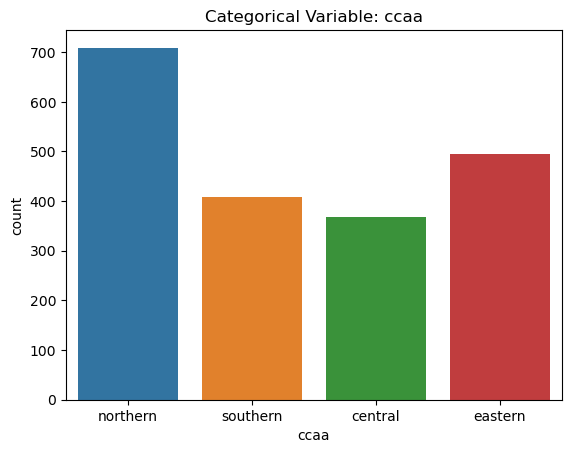

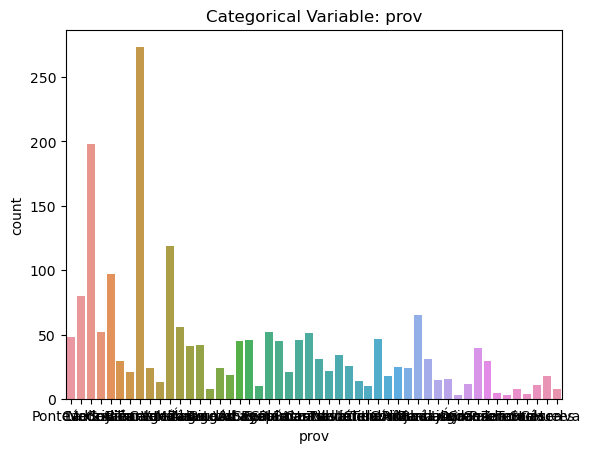

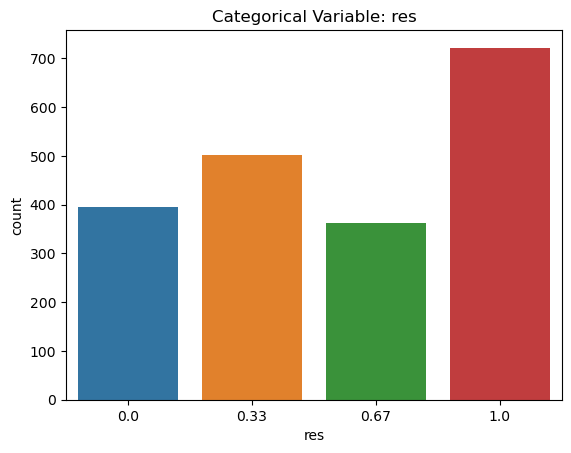

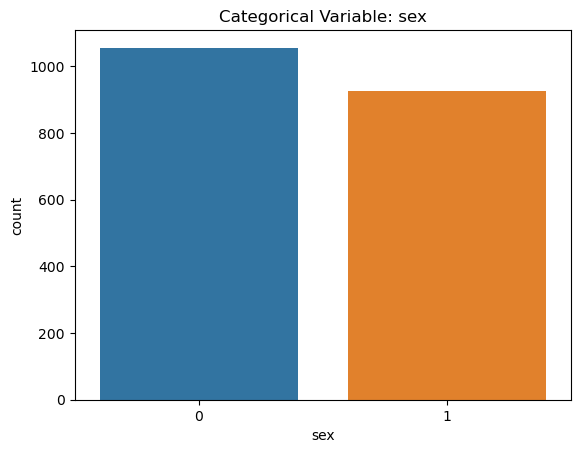

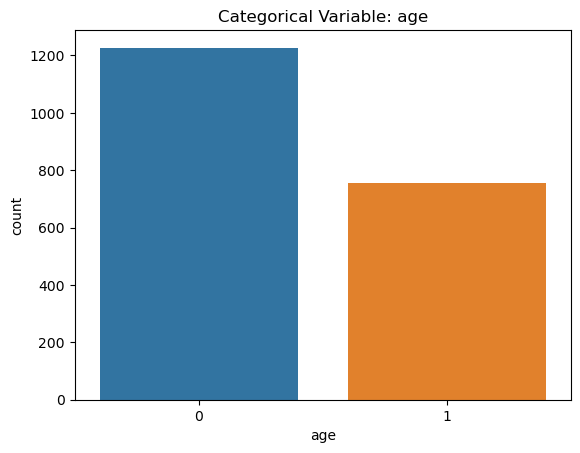

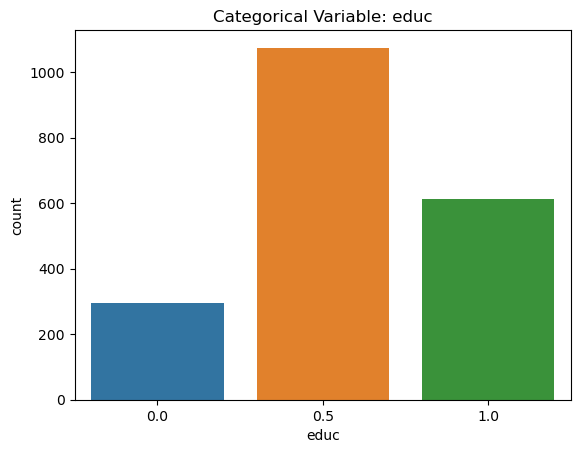

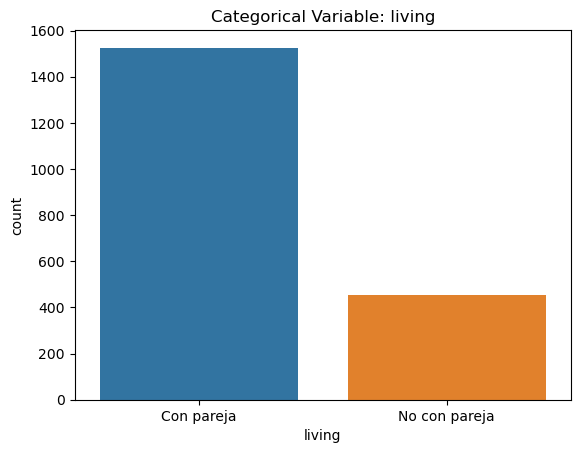

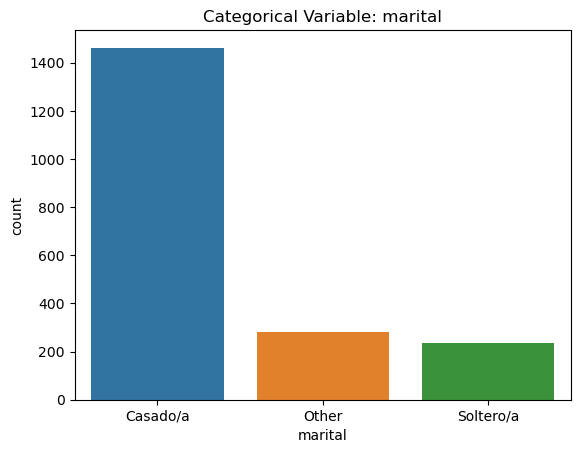

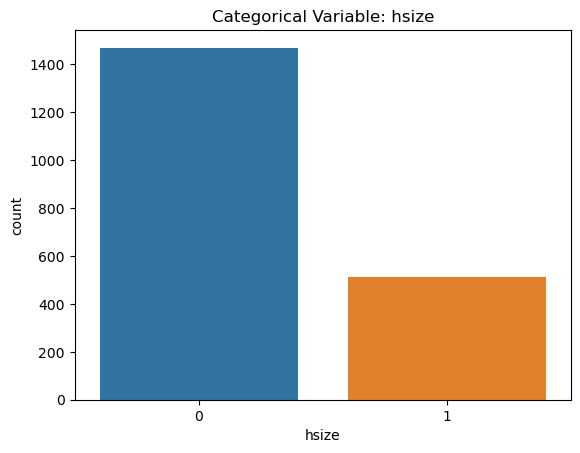

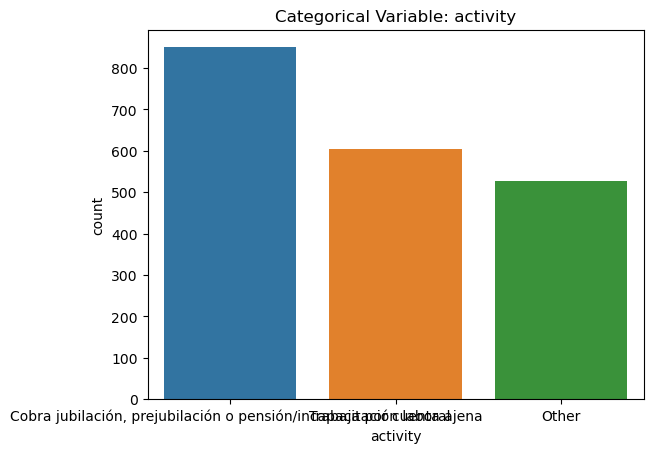

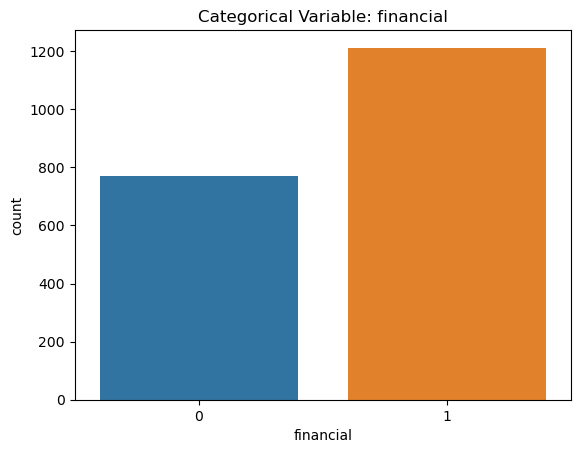

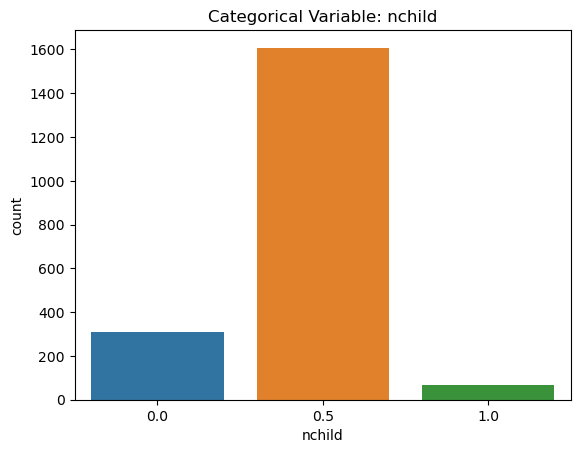

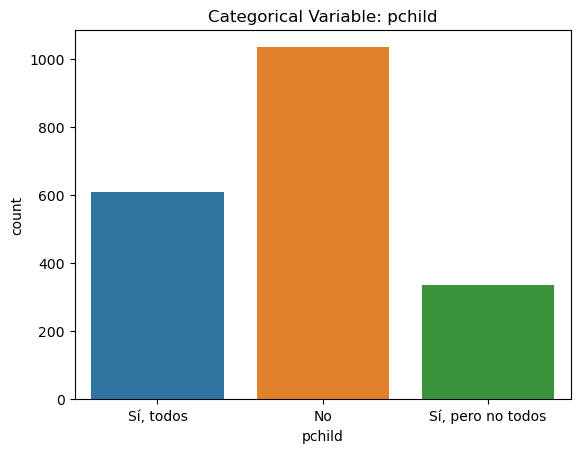

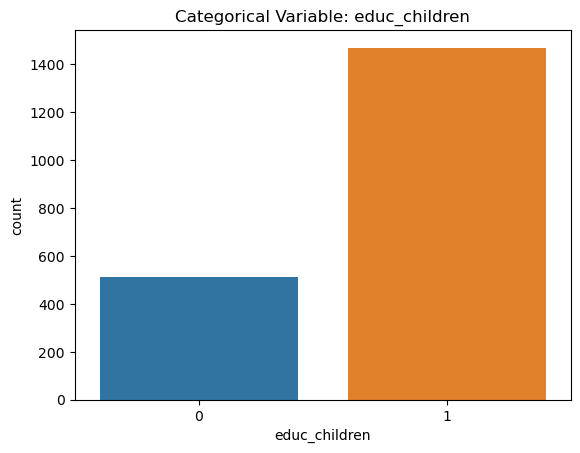

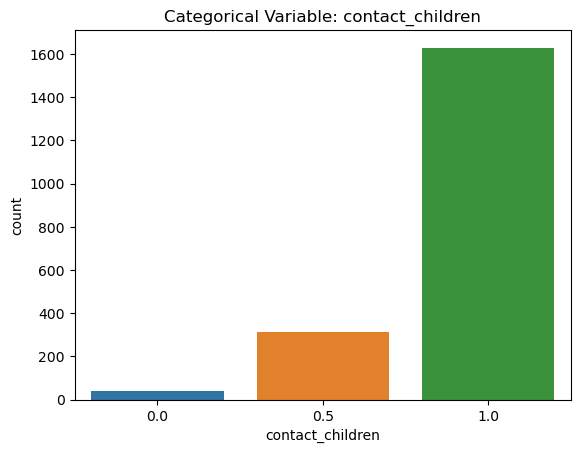

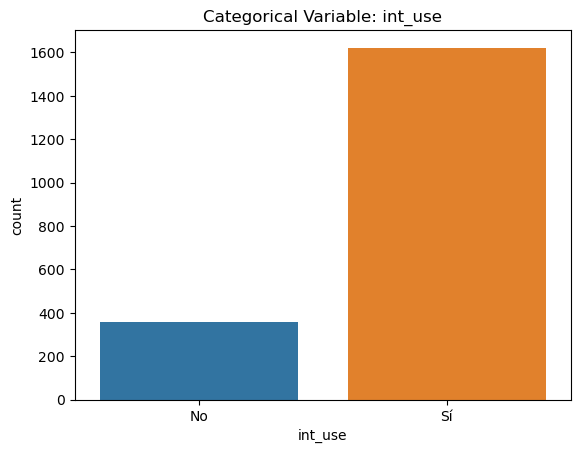

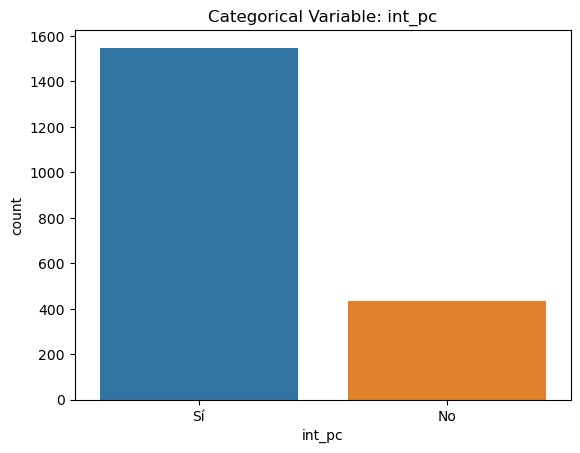

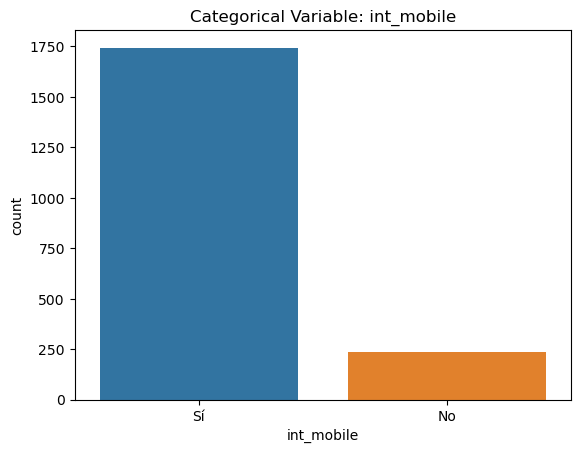

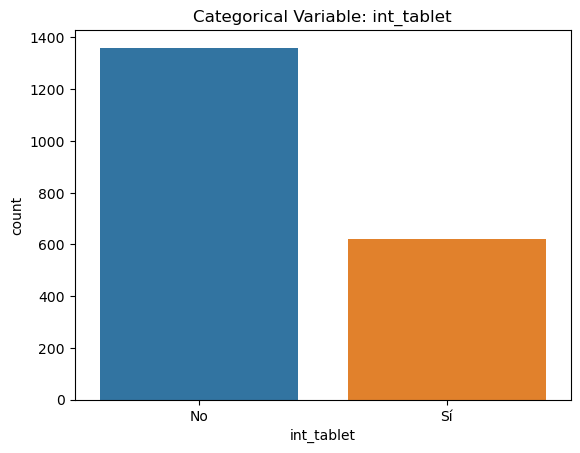

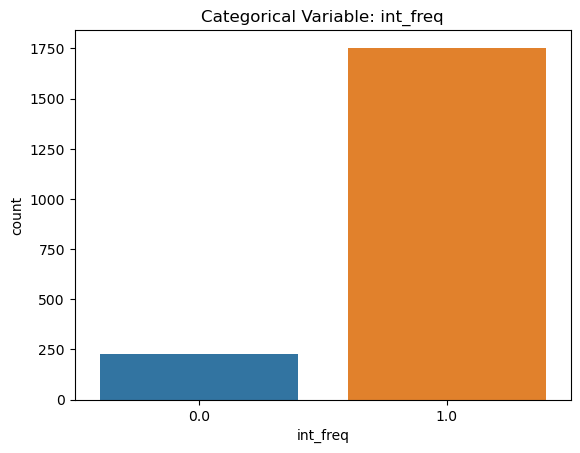

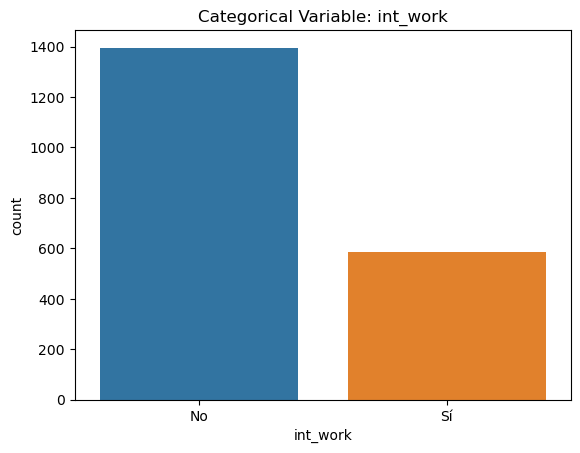

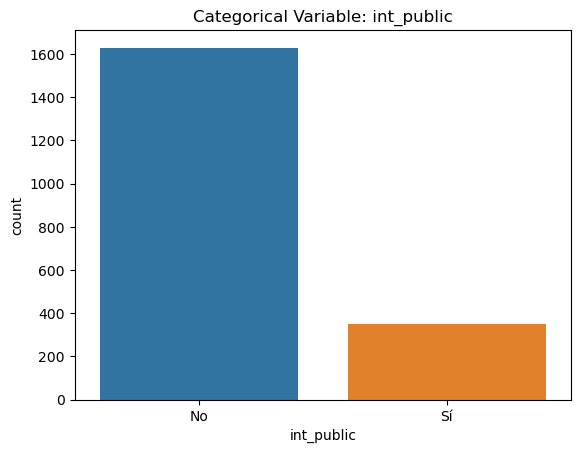

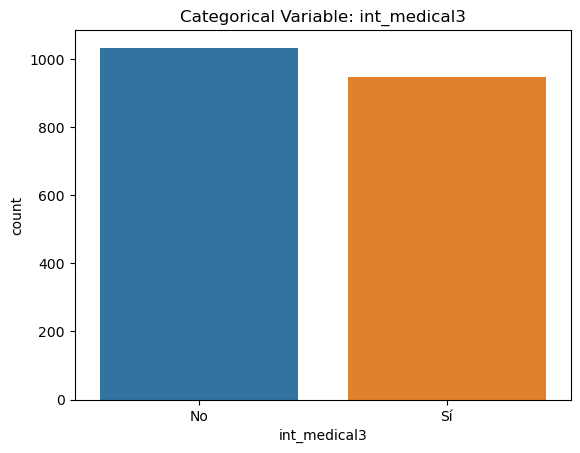

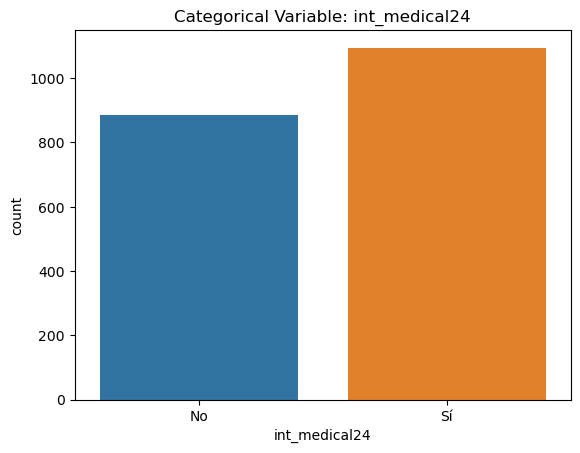

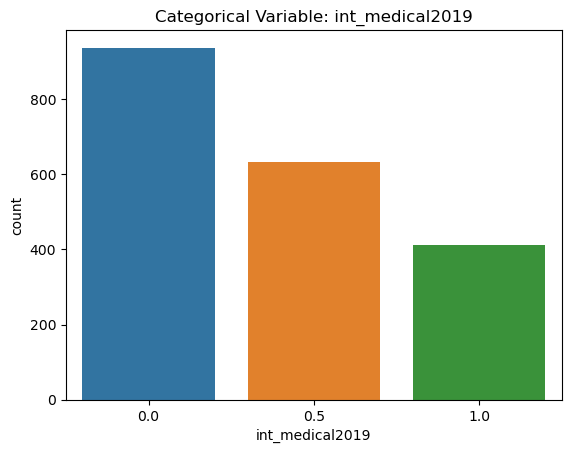

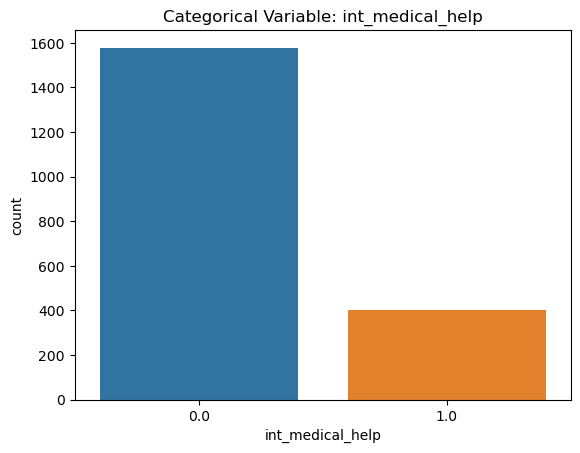

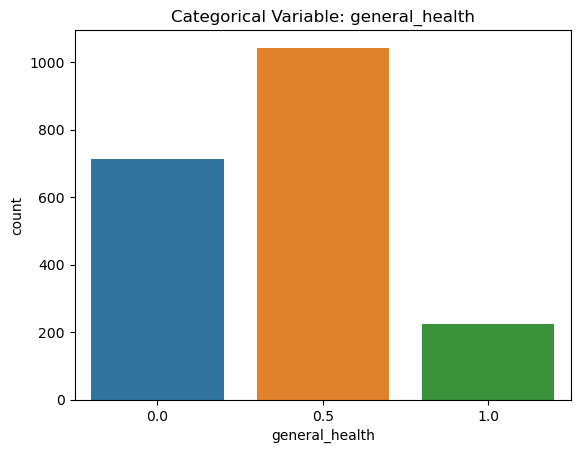

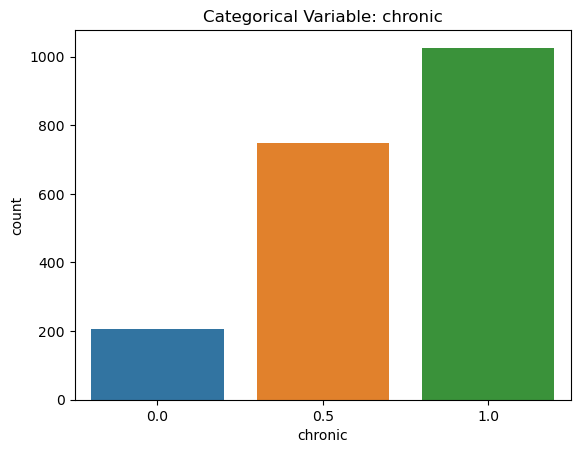

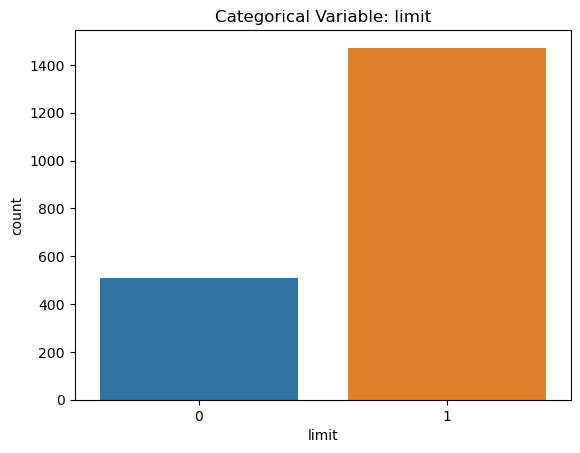

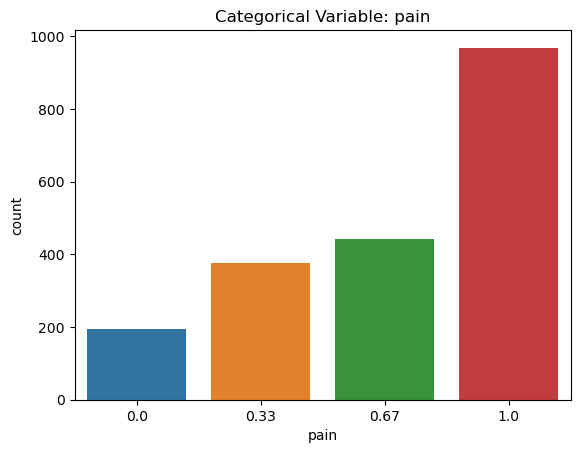

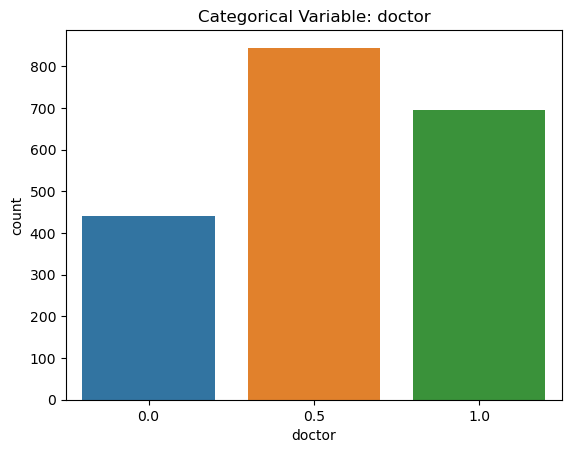

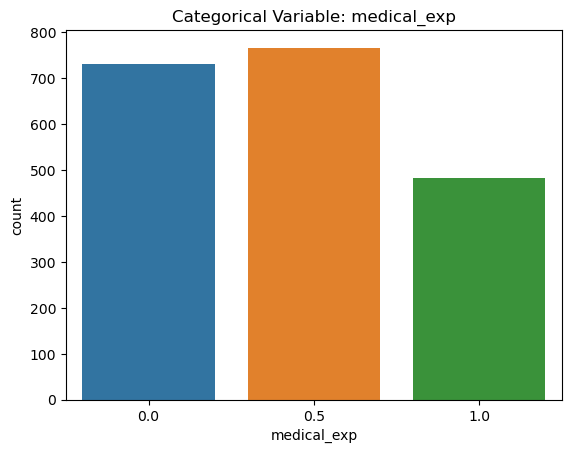

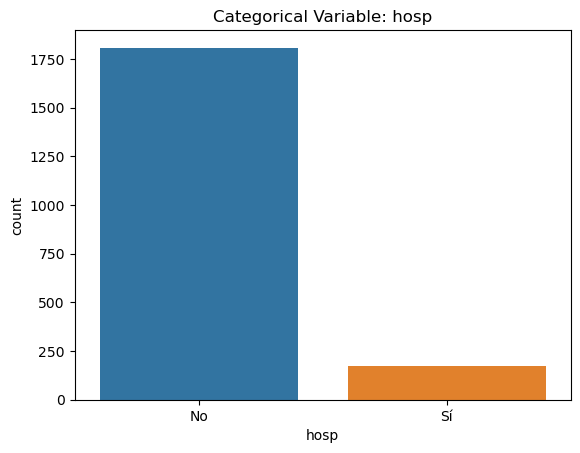

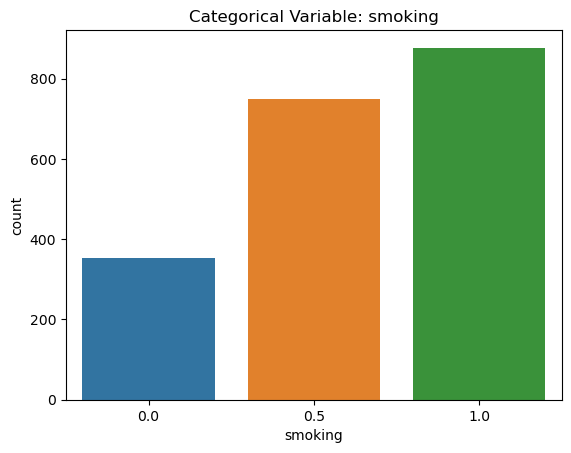

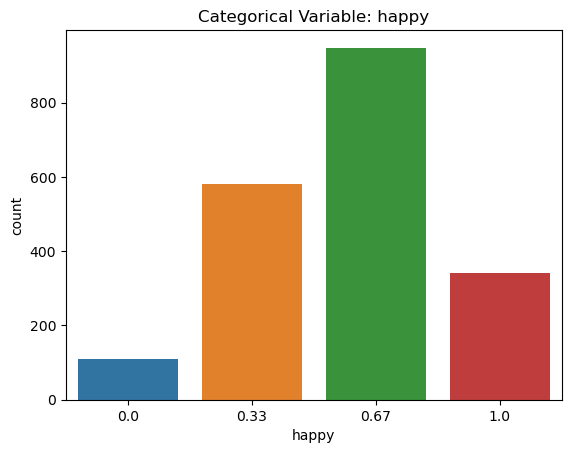

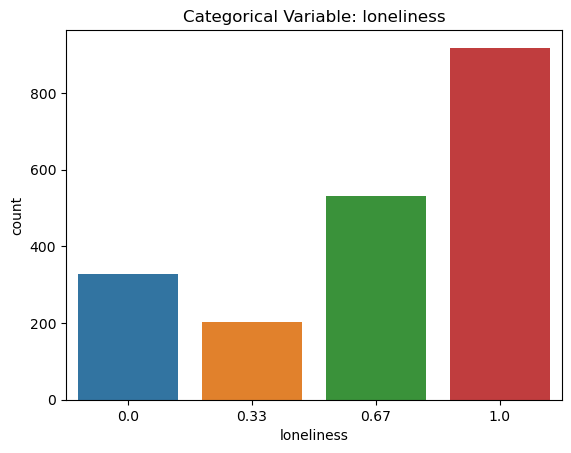

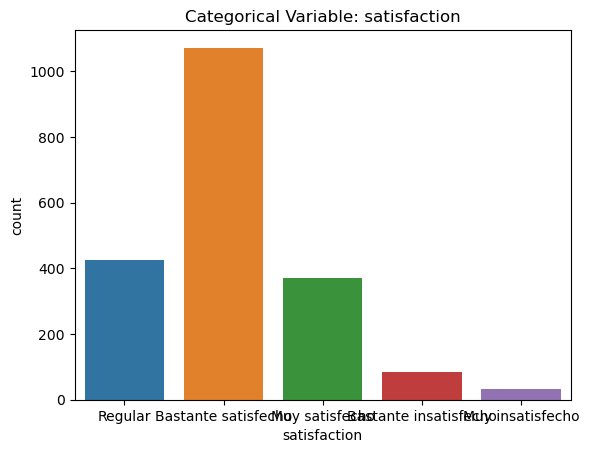

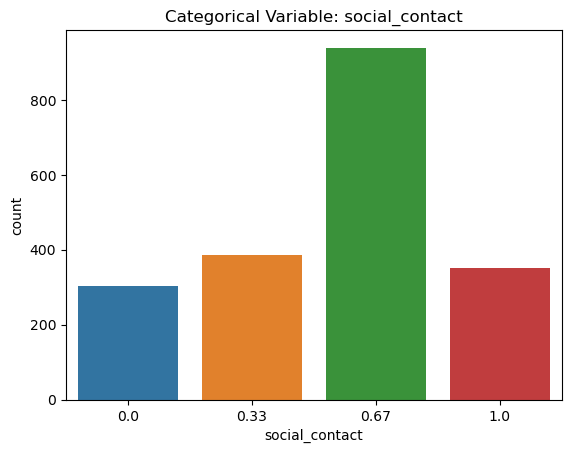

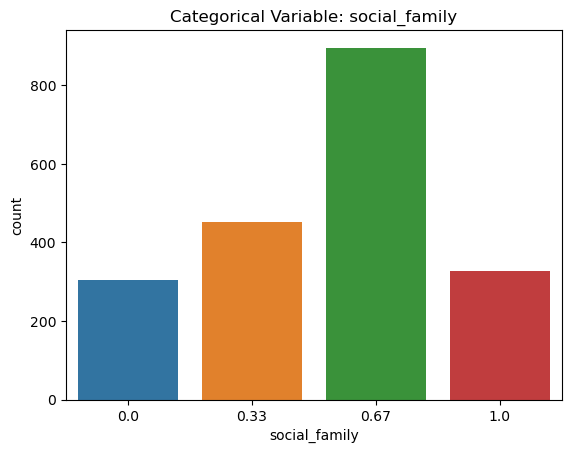

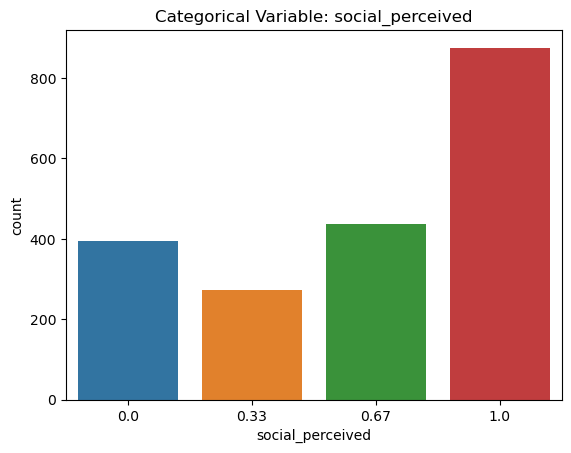

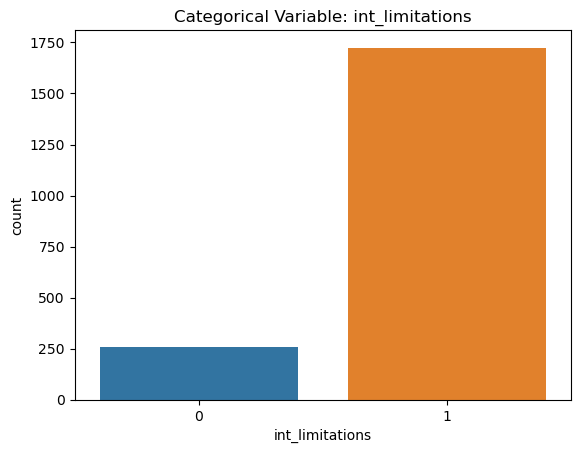

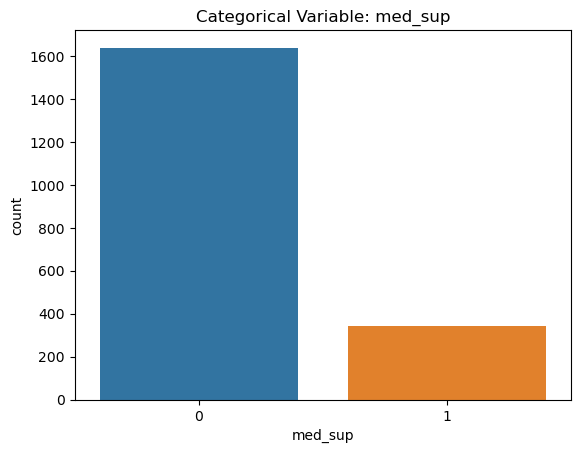

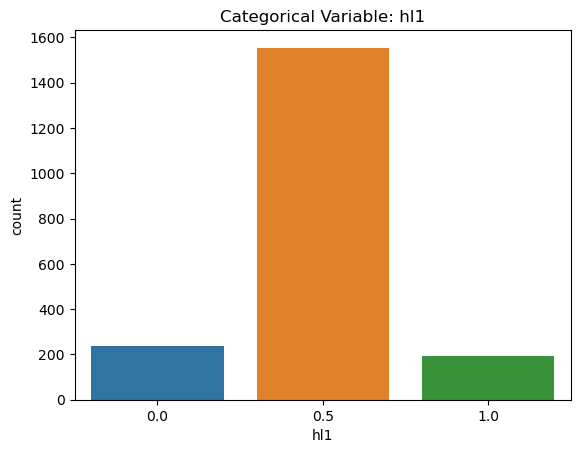

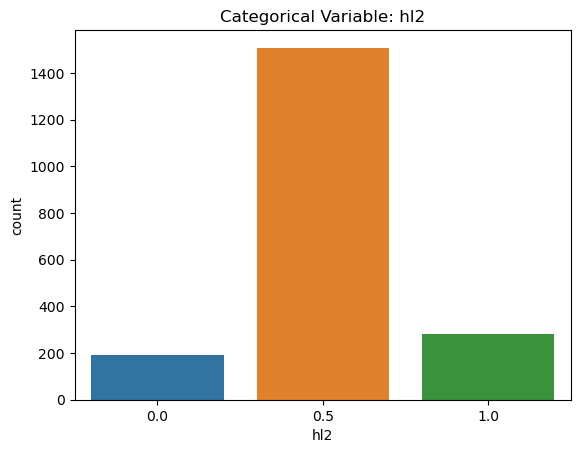

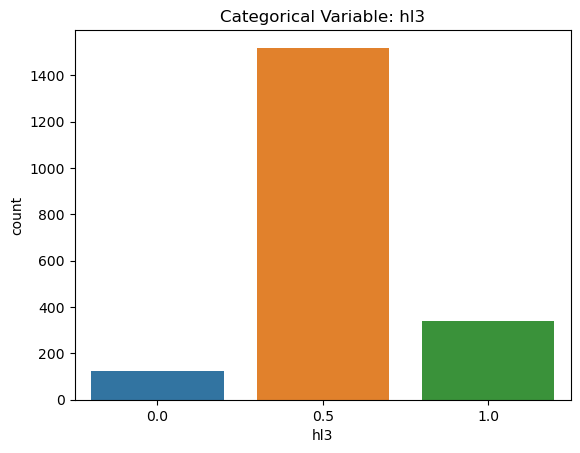

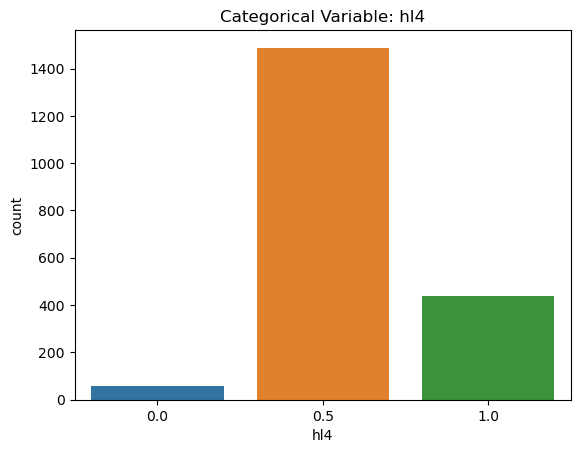

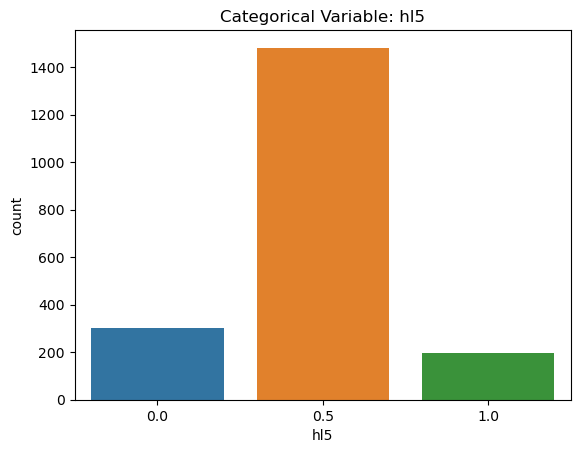

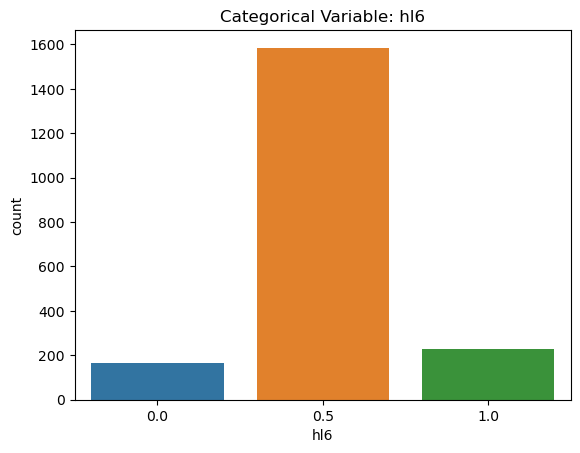

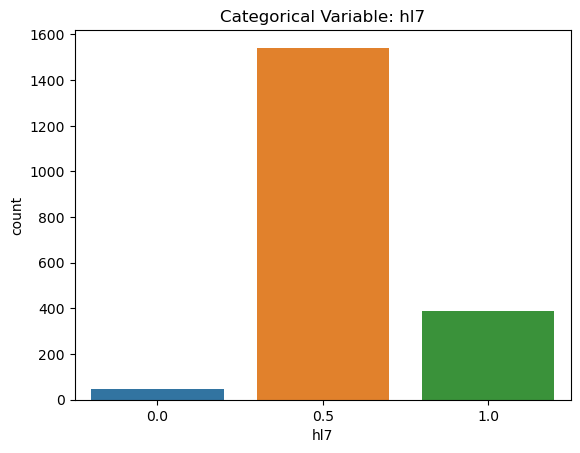

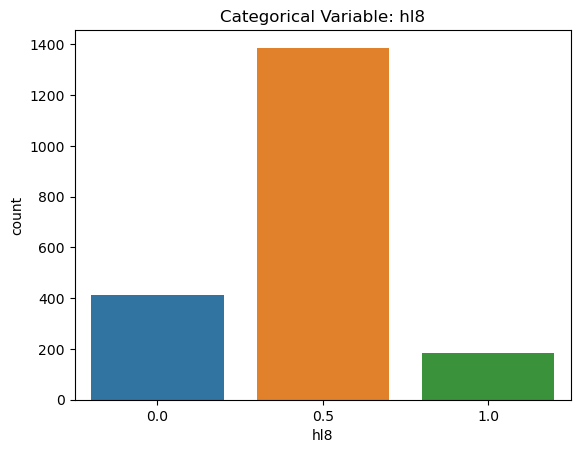

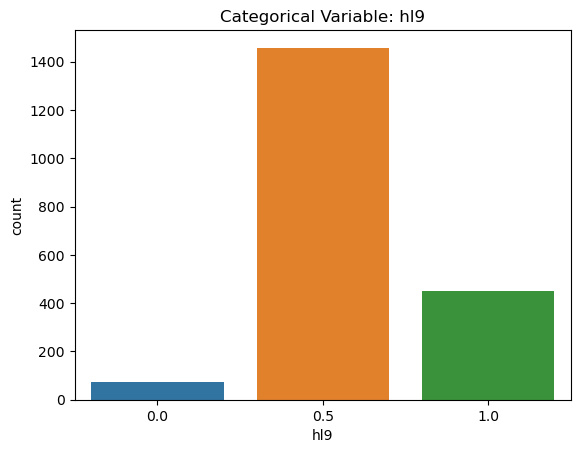

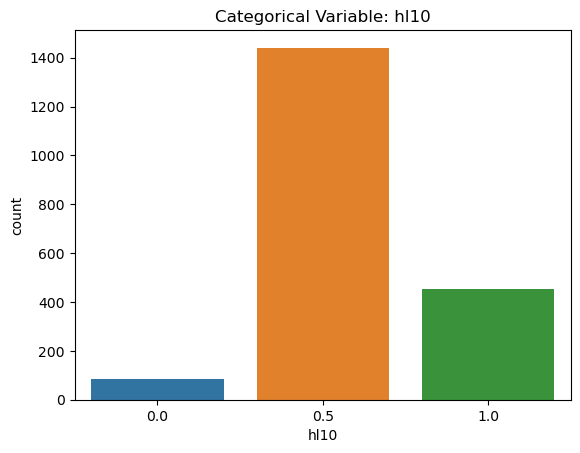

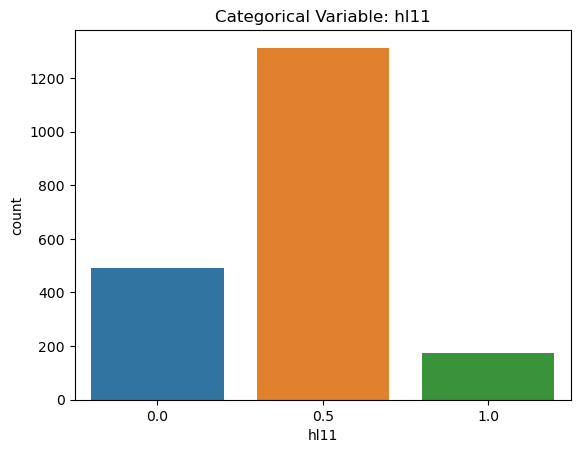

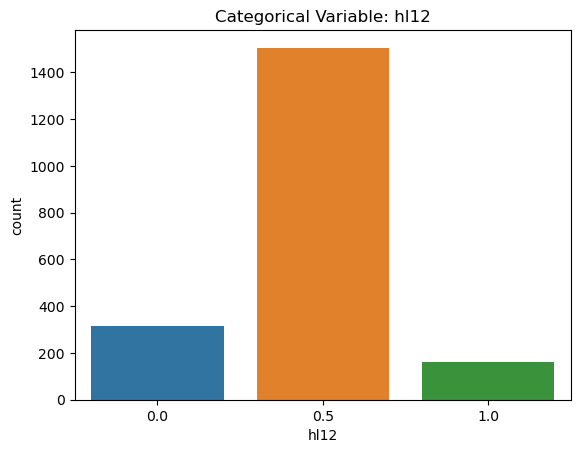

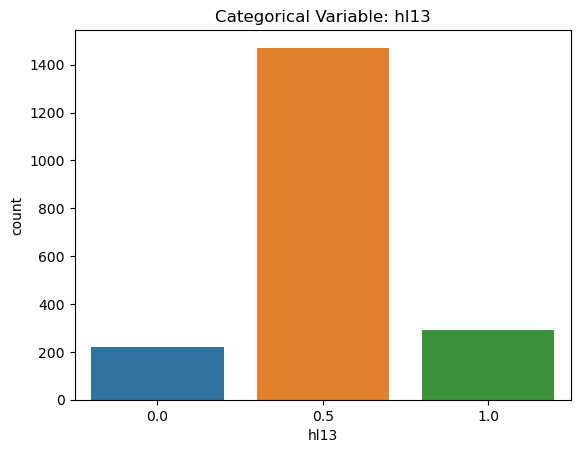

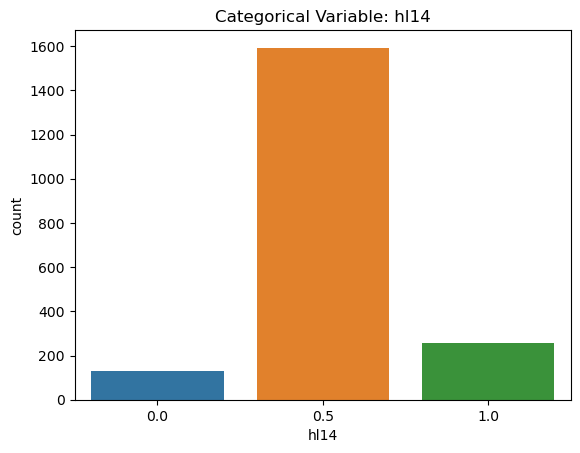

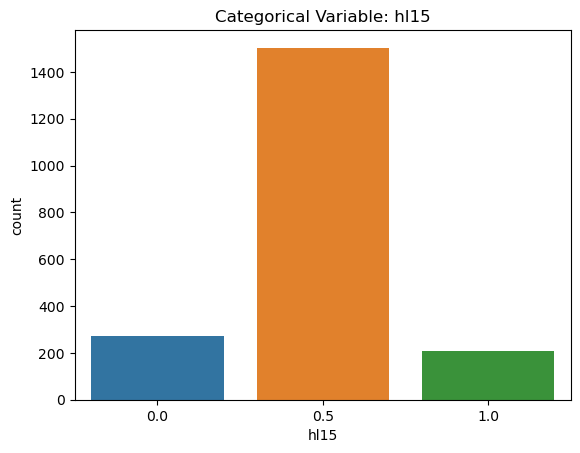

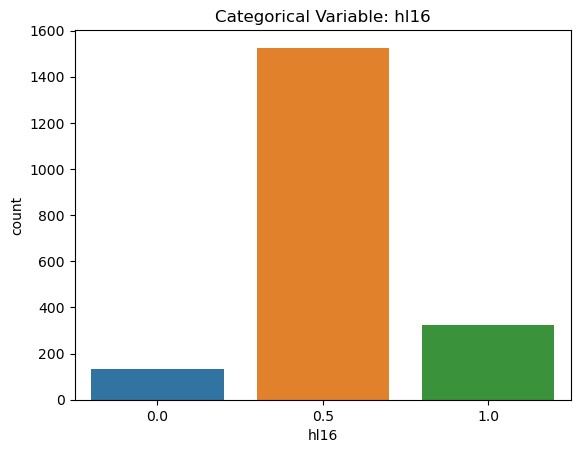

In [63]:
def plot_categorical(dataframe):
    for column in cat.columns:
        sns.countplot(data=cat, x=column)
        plt.title(f'Categorical Variable: {column}')
        plt.show()
        
plot_categorical(cat) 

In [64]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1981.0,3823.577991,2603.243411,10.000000,1530.000000,3367.000000,6051.000000,9472.000000
pond,1981.0,1.000401,0.282111,0.710793,0.790617,0.841610,1.194380,1.604841
interv,1981.0,842.535083,231.625986,18.000000,813.000000,979.000000,986.000000,992.000000
duration,1981.0,10.793404,3.286404,4.600000,8.416667,10.433333,12.583333,29.150000


For modeling I will exclude num columns as predictors because they don't contribute to explaining the target variable

### Processing Data

In [65]:
# X/y split (feature/target): X, y
y = full_data['satisfaction']
X = full_data.drop(['satisfaction', 'id', 'pond', 'interv', 'duration'], axis=1)


In [66]:
y.head()

1                Regular
2                Regular
3                Regular
4    Bastante satisfecho
5    Bastante satisfecho
Name: satisfaction, dtype: object

In [67]:
X.head()

,ccaa,prov,res,sex,age,educ,living,marital,hsize,activity,...,hl7,hl8,hl9,hl10,hl11,hl12,hl13,hl14,hl15,hl16
1,northern,Pontevedra,1.00,0,1,0.0,Con pareja,Casado/a,0,"Cobra jubilación, prejubilación o pensión/inca...",...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,southern,Cádiz,1.00,1,1,1.0,Con pareja,Casado/a,1,"Cobra jubilación, prejubilación o pensión/inca...",...,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.5
3,central,Madrid,1.00,0,1,0.0,No con pareja,Other,0,"Cobra jubilación, prejubilación o pensión/inca...",...,0.5,0.5,0.5,0.5,0.0,0.0,1.0,0.5,0.5,0.5
4,northern,La Coruña,0.33,0,1,0.0,No con pareja,Other,0,"Cobra jubilación, prejubilación o pensión/inca...",...,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.5,0.5
5,northern,Pontevedra,1.00,1,1,1.0,Con pareja,Casado/a,0,"Cobra jubilación, prejubilación o pensión/inca...",...,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


#### Train test split

In [68]:
# train/test split : X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape) 

(1386, 57)

(595, 57)

(1386,)

(595,)

In [70]:
# num/cat split : X_train_num, X_train_cat, X_test_num, X_test_cat
X_train_cat = X_train.select_dtypes(include = object)
X_train_num =X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)
X_test_num =X_test.select_dtypes(include = np.number)

#### Scaling train and test

In [71]:
# transformer = MinMaxScaler().fit(X_train_num)
# X_train_num_norm = transformer.transform(X_train_num)
# print(X_train_num_norm.shape)
# X_train_num_scale = pd.DataFrame(X_train_num_norm, index = X_train_num.index, columns=X_train_num.columns)
# X_train_num_scale.reset_index(drop = True, inplace = True)
# X_train_num_scale.head()

In [72]:
# X_test_num_norm = transformer.transform(X_test_num)
# print(X_test_num_norm.shape)
# X_test_num_scale = pd.DataFrame(X_test_num_norm, index = X_test_num.index, columns=X_test_num.columns)
# X_test_num_scale.reset_index(drop = True, inplace=True)
# X_test_num_scale.head()

#### Encoding train and test

In [73]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

cols = encoder.get_feature_names(input_features=X_train_cat.columns)

X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)

X_train_cat_encode.reset_index(drop = True, inplace = True)
display(X_train_cat_encode.head())
X_train_cat_encode.shape

C:\Users\laiag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ccaa_eastern,ccaa_northern,ccaa_southern,prov_Alicante,prov_Almería,prov_Asturias,prov_Badajoz,prov_Balears,prov_Barcelona,prov_Burgos,...,"pchild_Sí, todos",int_use_Sí,int_pc_Sí,int_mobile_Sí,int_tablet_Sí,int_work_Sí,int_public_Sí,int_medical3_Sí,int_medical24_Sí,hosp_Sí
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


(1386, 68)

In [74]:
cols = encoder.get_feature_names(input_features=X_test_cat.columns)

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)

X_test_cat_encode.reset_index(drop = True, inplace = True)
display(X_test_cat_encode.head())
X_test_cat_encode.shape

C:\Users\laiag\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ccaa_eastern,ccaa_northern,ccaa_southern,prov_Alicante,prov_Almería,prov_Asturias,prov_Badajoz,prov_Balears,prov_Barcelona,prov_Burgos,...,"pchild_Sí, todos",int_use_Sí,int_pc_Sí,int_mobile_Sí,int_tablet_Sí,int_work_Sí,int_public_Sí,int_medical3_Sí,int_medical24_Sí,hosp_Sí
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


(595, 68)

In [75]:
# Resetting indexes 
X_train_num.reset_index(drop=True, inplace=True)  # Add inplace=True
X_test_num.reset_index(drop=True, inplace=True)

X_train_cat_encode.reset_index(drop=True, inplace=True)
X_test_cat_encode.reset_index(drop=True, inplace=True)

#### Concat numerical and categorical for train and test

In [76]:
# build X_train and X_test
X_train_processed = pd.concat([X_train_num,X_train_cat_encode], axis=1)
X_train_processed.index
y_train.reset_index(drop = True, inplace = True)
X_train_processed.shape


(1386, 110)

In [77]:
X_test_processed = pd.concat([X_test_num,X_test_cat_encode], axis=1)
X_test_processed
y_test.reset_index(drop = True, inplace = True)
X_test_processed.shape

(595, 110)

### Modeling and validations

In [78]:
rf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)

dt = DecisionTreeClassifier(max_depth= 10,
                            min_samples_split= 50)

modelist = [
    rf,
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    dt
]

#### Hyperparameters
I've been checking and experimenting with hyperparameter values to find the optimal combination: 
- Limited Depth: Setting max_depth restricts the maximum depth and helps prevent overfitting as well as capture important patterns in the data without memorizing noise
- Minimum Samples: This helps prevent the creation of small, overly specific nodes that may capture noise in the training data.


In [79]:
def model_test_classification(modellist):
    
    for model in modellist:
        
        model.fit(X_train_processed, y_train)
        
        # Training Data
        train_predictions = model.predict(X_train_processed)
        # Accuracy
        train_accuracy = round(accuracy_score(y_train, train_predictions), 2)
        # Classification Report
        train_classification_report = classification_report(y_train, train_predictions)
        # Confusion Matrix
        train_confusion_matrix = confusion_matrix(y_train, train_predictions)
        
        # Test Data
        test_predictions = model.predict(X_test_processed)
        # Accuracy
        test_accuracy = round(accuracy_score(y_test, test_predictions), 2)
        # Classification Report
        test_classification_report = classification_report(y_test, test_predictions)
        # Confusion Matrix
        test_confusion_matrix = confusion_matrix(y_test, test_predictions)
        
        display(model)
        display(pd.DataFrame({'ValType': ['Train', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]}))
        print("Training Classification Report:\n", train_classification_report)
        print("Training Confusion Matrix:\n", train_confusion_matrix)
        print("\nTesting Classification Report:\n", test_classification_report)
        print("Testing Confusion Matrix:\n", test_confusion_matrix)

In [80]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)



In [81]:
%%time
warnings.filterwarnings("ignore")
model_test_classification(modelist)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=20)

,ValType,Accuracy
0,Train,0.55
1,Test,0.56


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        66
  Bastante satisfecho       0.55      0.99      0.71       748
     Muy insatisfecho       0.00      0.00      0.00        22
       Muy satisfecho       1.00      0.01      0.02       256
              Regular       0.46      0.06      0.11       294

             accuracy                           0.55      1386
            macro avg       0.40      0.21      0.17      1386
         weighted avg       0.58      0.55      0.41      1386

Training Confusion Matrix:
 [[  0  56   0   0  10]
 [  0 744   0   0   4]
 [  0  15   0   0   7]
 [  0 253   0   2   1]
 [  0 275   0   0  19]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.55      1.00      0.71       323
     Muy insatisfecho       0.

GradientBoostingClassifier()

,ValType,Accuracy
0,Train,0.84
1,Test,0.63


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       1.00      0.91      0.95        66
  Bastante satisfecho       0.81      0.96      0.88       748
     Muy insatisfecho       1.00      1.00      1.00        22
       Muy satisfecho       0.90      0.62      0.73       256
              Regular       0.87      0.72      0.79       294

             accuracy                           0.84      1386
            macro avg       0.92      0.84      0.87      1386
         weighted avg       0.85      0.84      0.84      1386

Training Confusion Matrix:
 [[ 60   2   0   0   4]
 [  0 717   0  10  21]
 [  0   0  22   0   0]
 [  0  91   0 158   7]
 [  0  76   0   7 211]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.14      0.11      0.12        18
  Bastante satisfecho       0.66      0.82      0.73       323
     Muy insatisfecho       0.

LogisticRegression()

,ValType,Accuracy
0,Train,0.65
1,Test,0.60


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.66      0.38      0.48        66
  Bastante satisfecho       0.65      0.88      0.75       748
     Muy insatisfecho       1.00      0.23      0.37        22
       Muy satisfecho       0.73      0.37      0.49       256
              Regular       0.55      0.37      0.45       294

             accuracy                           0.65      1386
            macro avg       0.72      0.45      0.51      1386
         weighted avg       0.65      0.65      0.62      1386

Training Confusion Matrix:
 [[ 25  20   0   0  21]
 [  4 660   0  31  53]
 [  4   4   5   0   9]
 [  0 155   0  95   6]
 [  5 175   0   4 110]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.08      0.06      0.06        18
  Bastante satisfecho       0.63      0.84      0.72       323
     Muy insatisfecho       0.

SVC()

,ValType,Accuracy
0,Train,0.61
1,Test,0.57


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       1.00      0.06      0.11        66
  Bastante satisfecho       0.60      1.00      0.75       748
     Muy insatisfecho       0.00      0.00      0.00        22
       Muy satisfecho       1.00      0.02      0.04       256
              Regular       0.66      0.32      0.43       294

             accuracy                           0.61      1386
            macro avg       0.65      0.28      0.27      1386
         weighted avg       0.70      0.61      0.51      1386

Training Confusion Matrix:
 [[  4  35   0   0  27]
 [  0 745   0   0   3]
 [  0   6   0   0  16]
 [  0 249   0   5   2]
 [  0 200   0   0  94]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.57      0.98      0.72       323
     Muy insatisfecho       0.

KNeighborsClassifier()

,ValType,Accuracy
0,Train,0.62
1,Test,0.53


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.67      0.12      0.21        66
  Bastante satisfecho       0.62      0.93      0.75       748
     Muy insatisfecho       0.67      0.09      0.16        22
       Muy satisfecho       0.56      0.28      0.37       256
              Regular       0.64      0.27      0.38       294

             accuracy                           0.62      1386
            macro avg       0.63      0.34      0.37      1386
         weighted avg       0.62      0.62      0.56      1386

Training Confusion Matrix:
 [[  8  41   1   6  10]
 [  1 698   0  26  23]
 [  1  13   2   0   6]
 [  0 180   0  71   5]
 [  2 190   0  23  79]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.56      0.86      0.68       323
     Muy insatisfecho       0.

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

,ValType,Accuracy
0,Train,0.70
1,Test,0.61


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.59      0.26      0.36        66
  Bastante satisfecho       0.73      0.87      0.79       748
     Muy insatisfecho       0.00      0.00      0.00        22
       Muy satisfecho       0.70      0.52      0.59       256
              Regular       0.62      0.57      0.60       294

             accuracy                           0.70      1386
            macro avg       0.53      0.44      0.47      1386
         weighted avg       0.68      0.70      0.68      1386

Training Confusion Matrix:
 [[ 17  17   0   5  27]
 [  4 652   0  33  59]
 [  4   8   0   0  10]
 [  0 116   0 132   8]
 [  4 102   0  19 169]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.66      0.78      0.72       323
     Muy insatisfecho       0.


### Results

#### RandomForestClassifier:
Training Accuracy: 55%

Testing Accuracy: 56%

Interpretation:
he model seems to struggle to generalize well to unseen data, as the test accuracy is only slightly better than random guessing. The classification report indicates poor performance for some classes, likely due to imbalances or the chosen hyperparameters not being optimal.

#### GradientBoostingClassifier:
Training Accuracy: 85%

Testing Accuracy: 63%

Interpretation:
The model performs well on the training data, but there is a noticeable drop in accuracy on the test set, suggesting a degree of overfitting. The precision, recall, and F1-score values are decent, but there's room for improvement

#### LogisticRegression:
Training Accuracy: 65%

Testing Accuracy: 60%

Interpretation:
The logistic regression model provides relatively balanced accuracy on both training and testing data. However, the classification report indicates that the model struggles with some classes, potentially due to the complexity of the underlying relationships

#### Support Vector Classifier (SVC):
Training Accuracy: 61%

Testing Accuracy: 57%

Interpretation:
The model doesn't perform exceptionally well on either training or testing data. The precision, recall, and F1-score values suggest that the model might not capture the underlying patterns effectively, especially for certain classes.

#### K-Nearest Neighbors Classifier:
Training Accuracy: 62%

Testing Accuracy: 53%

Interpretation:
The KNeighbors model has a similar pattern to the SVC, with moderate accuracy on both sets but not excelling. The model may not be capturing complex relationships effectively.

#### DecisionTreeClassifier:
Training Accuracy: 70%

Testing Accuracy: 62%

Interpretation:
The decision tree model shows reasonable performance, but there's still a gap between training and testing accuracy, indicating some overfitting. Fine-tuning hyperparameters or employing ensemble methods may further improve performance.

####Overall Conclusions:
- None of the models achieve exceptionally high accuracy, suggesting that there is room for improvement in model selection or hyperparameter tuning.
- GradientBoostingClassifier has the highest accuracy on the training set but exhibits overfitting on the test set.
- LogisticRegression provides a balanced performance, but there's room for improvement in capturing complex relationships.
- RandomForestClassifier struggles to generalize to the test set, possibly due to suboptimal hyperparameters.

#### Next steps:
- Explore feature engineering to improve model performance.
- Cross-validation 
- Class imbalances if present in the dataset, as it can impact model performance.

### Feature selection

In [82]:
# making full df of training_set for feature selection

In [83]:
data_train = pd.concat([X_train_processed,y_train],axis = 1)
data_train

,res,sex,age,educ,hsize,...,int_public_Sí,int_medical3_Sí,int_medical24_Sí,hosp_Sí,satisfaction
0,1.00,1,1,1.0,1,...,0.0,1.0,1.0,0.0,Bastante satisfecho
1,0.33,1,0,0.5,1,...,0.0,0.0,0.0,0.0,Bastante satisfecho
2,0.33,1,0,0.5,0,...,0.0,1.0,1.0,0.0,Regular
3,0.67,0,0,0.5,0,...,0.0,0.0,0.0,0.0,Bastante satisfecho
4,1.00,0,0,1.0,0,...,0.0,1.0,0.0,0.0,Bastante satisfecho
...,...,...,...,...,...,...,...,...,...,...,...
1381,1.00,0,0,1.0,0,...,0.0,0.0,0.0,0.0,Regular
1382,1.00,1,0,0.5,0,...,0.0,0.0,0.0,0.0,Bastante satisfecho
1383,0.67,0,0,0.5,0,...,0.0,0.0,1.0,0.0,Bastante satisfecho
1384,0.00,1,0,0.5,1,...,0.0,1.0,1.0,0.0,Muy satisfecho


In [84]:
Var_threshold = 0.02
sel = VarianceThreshold(threshold=Var_threshold)
                        
sel = sel.fit(X_train_processed)
temp = sel.transform(X_train_processed)
temp = pd.DataFrame(temp)
print(X_train_processed.shape)
print(temp.shape)
     

(1386, 110)
(1386, 76)


In [85]:
sel.variances_ > Var_threshold
sel.get_support()
var_list = list(sel.get_support())
len(var_list)

110

In [86]:
len(X_train_processed.columns)

110

In [87]:
list(zip(X_train_processed.columns,var_list))

[('res', True),
 ('sex', True),
 ('age', True),
 ('educ', True),
 ('hsize', True),
 ('financial', True),
 ('nchild', True),
 ('educ_children', True),
 ('contact_children', True),
 ('int_freq', True),
 ('int_medical2019', True),
 ('int_medical_help', True),
 ('general_health', True),
 ('chronic', True),
 ('limit', True),
 ('pain', True),
 ('doctor', True),
 ('medical_exp', True),
 ('smoking', True),
 ('happy', True),
 ('loneliness', True),
 ('social_contact', True),
 ('social_family', True),
 ('social_perceived', True),
 ('int_limitations', True),
 ('med_sup', True),
 ('hl1', True),
 ('hl2', True),
 ('hl3', True),
 ('hl4', True),
 ('hl5', True),
 ('hl6', True),
 ('hl7', True),
 ('hl8', True),
 ('hl9', True),
 ('hl10', True),
 ('hl11', True),
 ('hl12', True),
 ('hl13', True),
 ('hl14', True),
 ('hl15', True),
 ('hl16', True),
 ('ccaa_eastern', True),
 ('ccaa_northern', True),
 ('ccaa_southern', True),
 ('prov_Alicante', False),
 ('prov_Almería', False),
 ('prov_Asturias', True),
 ('prov_

In [88]:
drop_list = [col[0] for col in zip(X_train_processed.columns,var_list) if col[1] == False]
len(drop_list)

34

In [89]:
# Drop these columns but going to check the K-Best option to get even smaller # of features

In [90]:
X_train_fs = X_train_processed.drop(drop_list, axis = 1)
X_train_fs

,res,sex,age,educ,hsize,...,int_work_Sí,int_public_Sí,int_medical3_Sí,int_medical24_Sí,hosp_Sí
0,1.00,1,1,1.0,1,...,0.0,0.0,1.0,1.0,0.0
1,0.33,1,0,0.5,1,...,0.0,0.0,0.0,0.0,0.0
2,0.33,1,0,0.5,0,...,0.0,0.0,1.0,1.0,0.0
3,0.67,0,0,0.5,0,...,0.0,0.0,0.0,0.0,0.0
4,1.00,0,0,1.0,0,...,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1381,1.00,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0
1382,1.00,1,0,0.5,0,...,0.0,0.0,0.0,0.0,0.0
1383,0.67,0,0,0.5,0,...,1.0,0.0,0.0,1.0,0.0
1384,0.00,1,0,0.5,1,...,1.0,0.0,1.0,1.0,0.0


In [91]:
X_test_fs = X_test_processed.drop(drop_list, axis = 1)
X_test_fs

,res,sex,age,educ,hsize,...,int_work_Sí,int_public_Sí,int_medical3_Sí,int_medical24_Sí,hosp_Sí
0,0.00,0,0,0.5,0,...,0.0,0.0,0.0,0.0,0.0
1,0.33,1,1,0.5,0,...,1.0,1.0,1.0,1.0,0.0
2,0.67,1,0,0.5,0,...,0.0,0.0,0.0,0.0,0.0
3,0.67,1,1,0.5,0,...,0.0,0.0,1.0,1.0,0.0
4,0.00,1,0,1.0,0,...,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
590,0.67,1,0,0.5,0,...,0.0,0.0,0.0,0.0,0.0
591,0.67,1,0,1.0,0,...,1.0,0.0,0.0,0.0,0.0
592,1.00,1,1,0.5,0,...,0.0,1.0,1.0,1.0,1.0
593,0.67,1,1,0.5,1,...,1.0,1.0,0.0,0.0,0.0


### Adding in KBest

In [92]:
K_best = SelectKBest(chi2, k=25).fit_transform(X_train_fs, y_train)

print(K_best.shape)
selected = pd.DataFrame(K_best)
selected.head()



(1386, 25)


,0,1,2,3,4,...,20,21,22,23,24
0,1.0,0.0,0.5,1.0,1.00,...,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.5,1.0,0.67,...,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.00,...,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.00,...,1.0,0.0,0.0,0.0,0.0


In [93]:
model = SelectKBest(chi2, k=25).fit(X_train_fs,y_train)
df = pd.DataFrame(data = model.scores_, columns=['score'])
df['column_name']= X_train_fs.columns
display(df.shape)
df
df.sort_values(by = ['score'],ascending = False).head(50)

(76, 2)

,score,column_name
19,49.915227,happy
20,36.034927,loneliness
5,34.969566,financial
12,34.627801,general_health
60,26.220358,living_No con pareja
...,...,...
39,2.750015,hl14
73,2.635477,int_medical3_Sí
43,2.591643,ccaa_northern
29,2.473266,hl4


In [94]:
cols = df.sort_values(by = ['score'],ascending = False).head(25)['column_name']
col_list = list(cols)
col_list

['happy',
 'loneliness',
 'financial',
 'general_health',
 'living_No con pareja',
 'limit',
 'int_work_Sí',
 'social_perceived',
 'hosp_Sí',
 'sex',
 'marital_Soltero/a',
 'marital_Other',
 'pain',
 'social_contact',
 'int_public_Sí',
 'activity_Other',
 'hl13',
 'prov_Balears',
 'int_medical24_Sí',
 'med_sup',
 'prov_Málaga',
 'activity_Trabaja por cuenta ajena',
 'pchild_Sí, todos',
 'prov_Murcia',
 'int_tablet_Sí']

In [95]:
X_train_all = X_train_fs[col_list]
X_train_all

,happy,loneliness,financial,general_health,living_No con pareja,...,prov_Málaga,activity_Trabaja por cuenta ajena,"pchild_Sí, todos",prov_Murcia,int_tablet_Sí
0,0.67,1.00,0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.67,1.00,1,0.5,0.0,...,0.0,1.0,1.0,0.0,0.0
2,0.33,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.67,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.67,1.00,1,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1381,0.33,0.67,0,0.5,0.0,...,0.0,0.0,0.0,1.0,0.0
1382,0.67,0.67,1,0.5,0.0,...,0.0,0.0,1.0,0.0,1.0
1383,0.67,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1384,1.00,1.00,1,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0


In [96]:
X_test_all = X_test_fs[col_list]
X_test_all 

,happy,loneliness,financial,general_health,living_No con pareja,...,prov_Málaga,activity_Trabaja por cuenta ajena,"pchild_Sí, todos",prov_Murcia,int_tablet_Sí
0,0.67,0.67,1,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.67,0.67,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
2,0.67,1.00,0,0.5,0.0,...,0.0,0.0,1.0,1.0,0.0
3,0.67,0.67,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.67,0.67,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
590,0.33,0.33,0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0
591,0.67,0.67,1,0.5,0.0,...,0.0,1.0,0.0,0.0,0.0
592,1.00,1.00,0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0
593,0.33,0.33,1,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0


In [97]:
coll_data= pd.concat([X_train_all, y_train], axis= 1)
coll_data

,happy,loneliness,financial,general_health,living_No con pareja,...,activity_Trabaja por cuenta ajena,"pchild_Sí, todos",prov_Murcia,int_tablet_Sí,satisfaction
0,0.67,1.00,0,0.5,0.0,...,0.0,0.0,0.0,0.0,Bastante satisfecho
1,0.67,1.00,1,0.5,0.0,...,1.0,1.0,0.0,0.0,Bastante satisfecho
2,0.33,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,Regular
3,0.67,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,Bastante satisfecho
4,0.67,1.00,1,0.0,0.0,...,1.0,0.0,0.0,1.0,Bastante satisfecho
...,...,...,...,...,...,...,...,...,...,...,...
1381,0.33,0.67,0,0.5,0.0,...,0.0,0.0,1.0,0.0,Regular
1382,0.67,0.67,1,0.5,0.0,...,0.0,1.0,0.0,1.0,Bastante satisfecho
1383,0.67,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,Bastante satisfecho
1384,1.00,1.00,1,1.0,0.0,...,1.0,1.0,0.0,0.0,Muy satisfecho


### Looking at multicolinearity

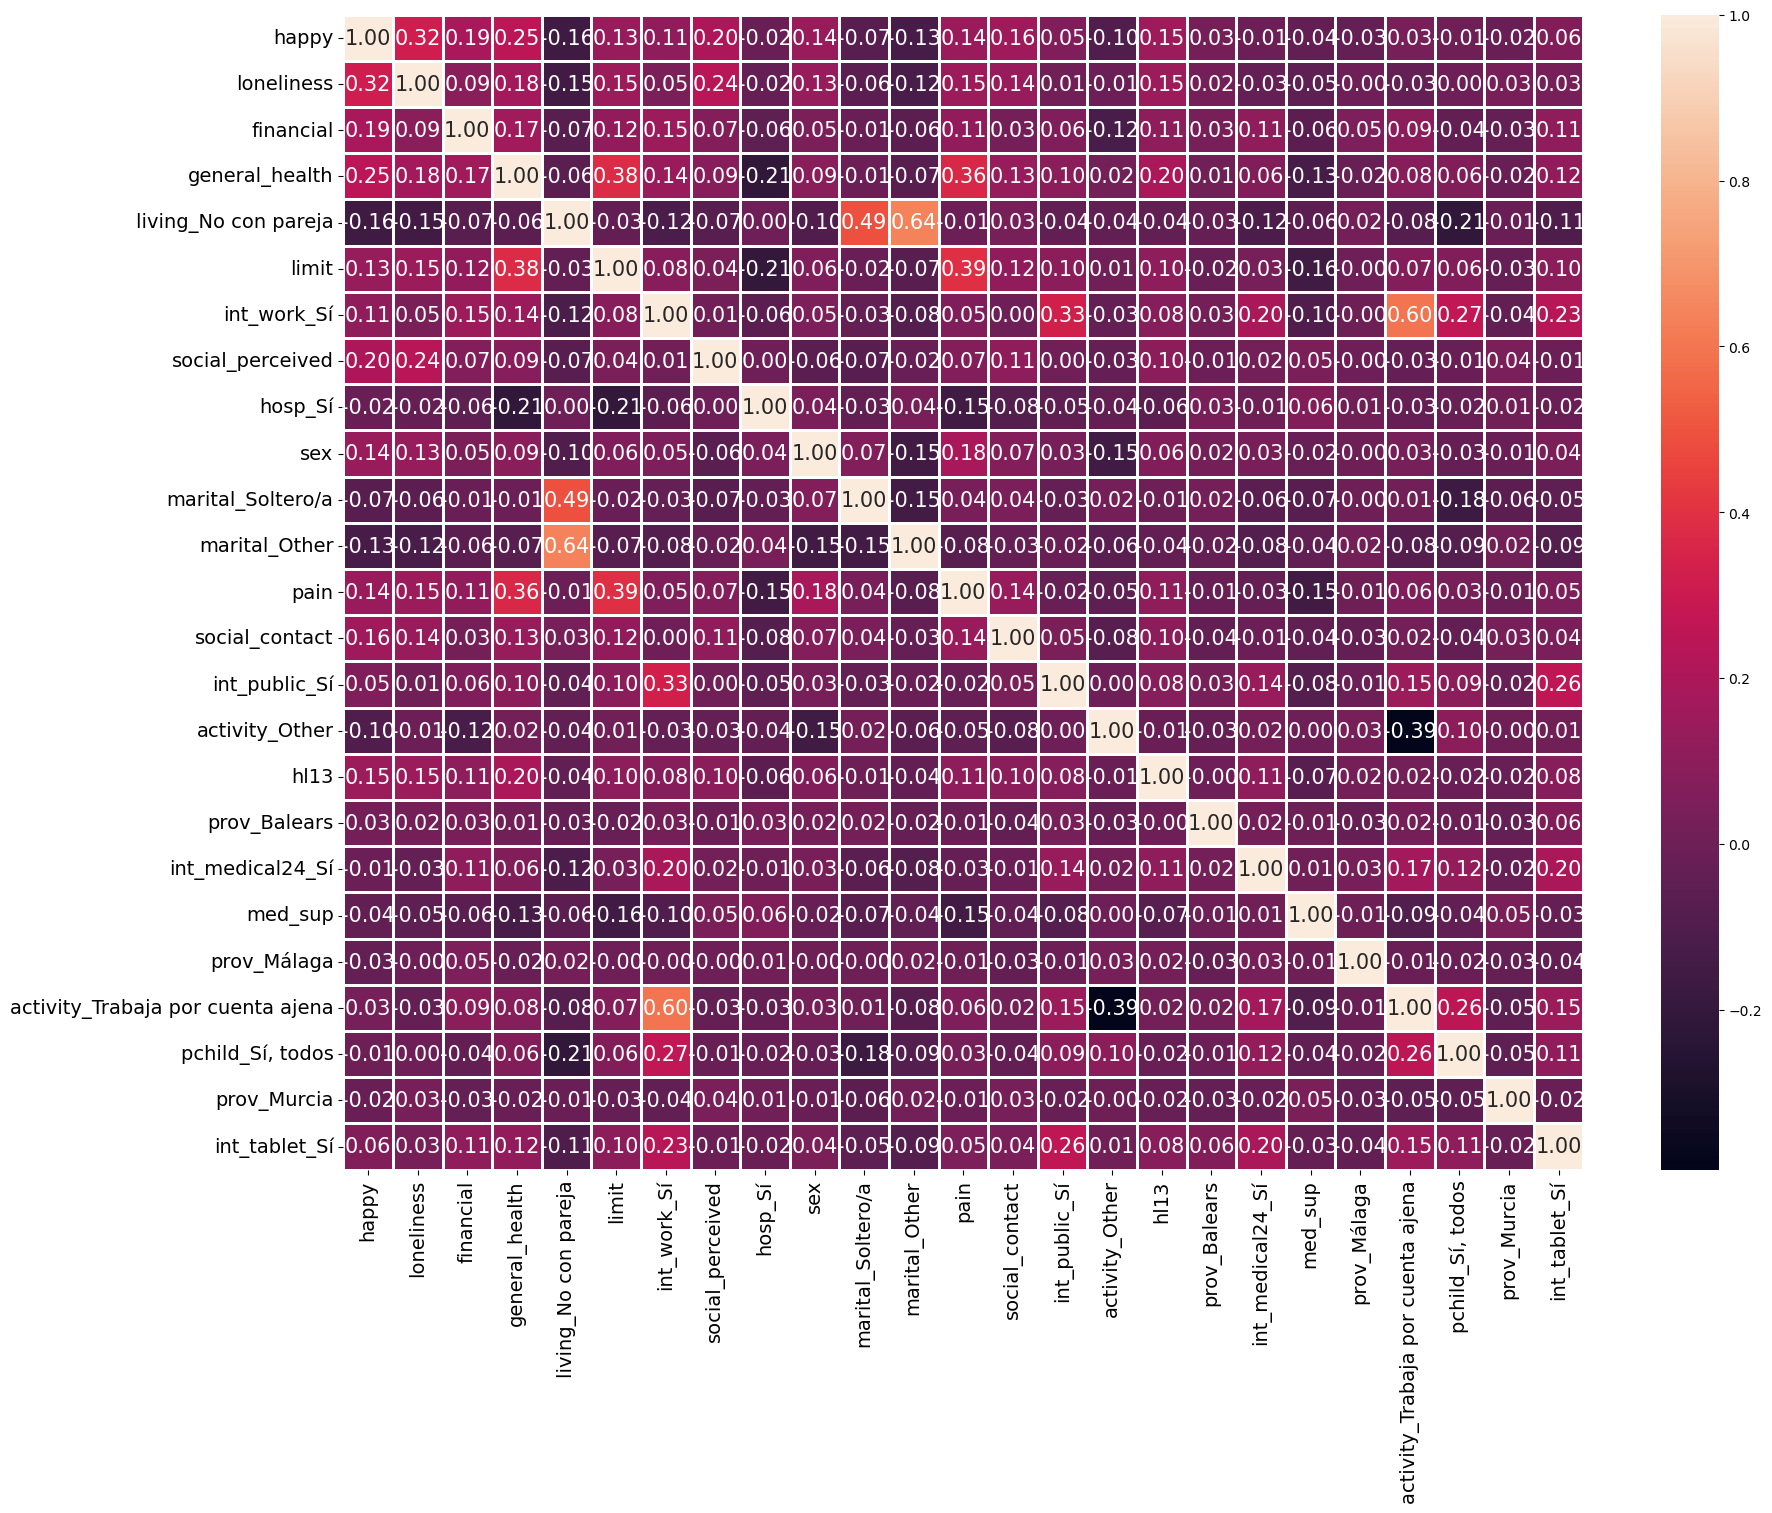

In [98]:
corr_matrix = coll_data.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix, annot = True, fmt=".2f", linewidths=1, annot_kws={"size": 15})
# Increase the font size of the X-axis (column names)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
# Increase the font size of the Y-axis (row names)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
plt.show()

In [99]:
# I don't have hight multi-collinearity

### Let's run the models again with the chosen features.

In [100]:
def model_test_classification_2(modellist):
    
    for model in modellist:
        
        model.fit(X_train_all, y_train)
        
        # Training Data
        train_predictions = model.predict(X_train_all)
        # Accuracy
        train_accuracy = round(accuracy_score(y_train, train_predictions), 2)
        # Classification Report
        train_classification_report = classification_report(y_train, train_predictions)
        # Confusion Matrix
        train_confusion_matrix = confusion_matrix(y_train, train_predictions)
        
        # Test Data
        test_predictions = model.predict(X_test_all)
        # Accuracy
        test_accuracy = round(accuracy_score(y_test, test_predictions), 2)
        # Classification Report
        test_classification_report = classification_report(y_test, test_predictions)
        # Confusion Matrix
        test_confusion_matrix = confusion_matrix(y_test, test_predictions)
        
        display(model)
        display(pd.DataFrame({'ValType': ['Train', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]}))
        print("Training Classification Report:\n", train_classification_report)
        print("Training Confusion Matrix:\n", train_confusion_matrix)
        print("\nTesting Classification Report:\n", test_classification_report)
        print("Testing Confusion Matrix:\n", test_confusion_matrix)

In [101]:
%%time
model_test_classification_2(modelist)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=20)

,ValType,Accuracy
0,Train,0.60
1,Test,0.59


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        66
  Bastante satisfecho       0.61      0.96      0.74       748
     Muy insatisfecho       0.00      0.00      0.00        22
       Muy satisfecho       0.88      0.11      0.19       256
              Regular       0.53      0.30      0.38       294

             accuracy                           0.60      1386
            macro avg       0.40      0.27      0.26      1386
         weighted avg       0.60      0.60      0.52      1386

Training Confusion Matrix:
 [[  0  28   0   0  38]
 [  0 719   0   4  25]
 [  0   8   0   0  14]
 [  0 225   0  28   3]
 [  0 205   0   0  89]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.59      0.94      0.72       323
     Muy insatisfecho       0.

GradientBoostingClassifier()

,ValType,Accuracy
0,Train,0.77
1,Test,0.64


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.94      0.68      0.79        66
  Bastante satisfecho       0.75      0.91      0.82       748
     Muy insatisfecho       1.00      1.00      1.00        22
       Muy satisfecho       0.80      0.50      0.61       256
              Regular       0.76      0.66      0.70       294

             accuracy                           0.77      1386
            macro avg       0.85      0.75      0.79      1386
         weighted avg       0.77      0.77      0.76      1386

Training Confusion Matrix:
 [[ 45  11   0   0  10]
 [  0 678   0  26  44]
 [  0   0  22   0   0]
 [  0 122   0 127   7]
 [  3  92   0   6 193]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.68      0.80      0.74       323
     Muy insatisfecho       0.

LogisticRegression()

,ValType,Accuracy
0,Train,0.62
1,Test,0.62


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.56      0.14      0.22        66
  Bastante satisfecho       0.63      0.88      0.74       748
     Muy insatisfecho       0.75      0.14      0.23        22
       Muy satisfecho       0.74      0.33      0.46       256
              Regular       0.48      0.35      0.40       294

             accuracy                           0.62      1386
            macro avg       0.63      0.37      0.41      1386
         weighted avg       0.62      0.62      0.58      1386

Training Confusion Matrix:
 [[  9  21   0   1  35]
 [  2 660   0  27  59]
 [  3   5   3   0  11]
 [  0 166   0  84   6]
 [  2 188   1   1 102]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.17      0.06      0.08        18
  Bastante satisfecho       0.63      0.89      0.74       323
     Muy insatisfecho       0.

SVC()

,ValType,Accuracy
0,Train,0.65
1,Test,0.58


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       1.00      0.06      0.11        66
  Bastante satisfecho       0.64      0.98      0.77       748
     Muy insatisfecho       0.00      0.00      0.00        22
       Muy satisfecho       1.00      0.18      0.31       256
              Regular       0.61      0.40      0.49       294

             accuracy                           0.65      1386
            macro avg       0.65      0.33      0.34      1386
         weighted avg       0.71      0.65      0.58      1386

Training Confusion Matrix:
 [[  4  26   0   0  36]
 [  0 731   0   0  17]
 [  0   4   0   0  18]
 [  0 204   0  47   5]
 [  0 175   0   0 119]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.00      0.00      0.00        18
  Bastante satisfecho       0.58      0.95      0.72       323
     Muy insatisfecho       0.

KNeighborsClassifier()

,ValType,Accuracy
0,Train,0.64
1,Test,0.56


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.56      0.27      0.37        66
  Bastante satisfecho       0.64      0.94      0.76       748
     Muy insatisfecho       0.67      0.09      0.16        22
       Muy satisfecho       0.66      0.30      0.42       256
              Regular       0.69      0.31      0.43       294

             accuracy                           0.64      1386
            macro avg       0.64      0.38      0.43      1386
         weighted avg       0.65      0.64      0.60      1386

Training Confusion Matrix:
 [[ 18  34   0   1  13]
 [  4 702   0  24  18]
 [  5   9   2   1   5]
 [  1 171   0  78   6]
 [  4 182   1  15  92]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.13      0.11      0.12        18
  Bastante satisfecho       0.59      0.89      0.71       323
     Muy insatisfecho       0.

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

,ValType,Accuracy
0,Train,0.66
1,Test,0.62


Training Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.38      0.48      0.42        66
  Bastante satisfecho       0.68      0.89      0.77       748
     Muy insatisfecho       0.00      0.00      0.00        22
       Muy satisfecho       0.68      0.40      0.50       256
              Regular       0.68      0.40      0.50       294

             accuracy                           0.66      1386
            macro avg       0.48      0.43      0.44      1386
         weighted avg       0.65      0.66      0.63      1386

Training Confusion Matrix:
 [[ 32  21   0   2  11]
 [ 13 663   0  34  38]
 [ 15   7   0   0   0]
 [  3 146   0 102   5]
 [ 22 142   0  13 117]]

Testing Classification Report:
                        precision    recall  f1-score   support

Bastante insatisfecho       0.04      0.06      0.05        18
  Bastante satisfecho       0.67      0.85      0.75       323
     Muy insatisfecho       0.

#### Overall:
- Feature selection didn't lead to significant improvements in model performance.
- Some models still exhibit issues with precision, recall, and F1-score, especially for specific classes ( "Bastante insatisfecho" and "Muy satisfecho").

### Fixing imbalance

In [102]:
y_train.value_counts()
# unbalanced

Bastante satisfecho      748
Regular                  294
Muy satisfecho           256
Bastante insatisfecho     66
Muy insatisfecho          22
Name: satisfaction, dtype: int64

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
clf.fit(X_train_all, y_train)
print('TrainSet = ',clf.score(X_train_all, y_train))
print('TestSet = ',clf.score(X_test_all, y_test))

TrainSet =  0.6060606060606061
TestSet =  0.6134453781512605


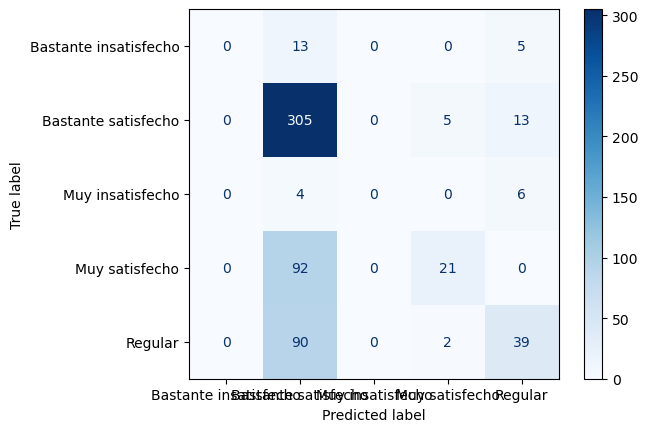

In [104]:
plot_confusion_matrix(clf, X_test_all, y_test,cmap=plt.cm.Blues)  
plt.show()

Class=4, n=425 (21.454%)
Class=1, n=1071 (54.064%)
Class=3, n=369 (18.627%)
Class=0, n=84 (4.240%)
Class=2, n=32 (1.615%)


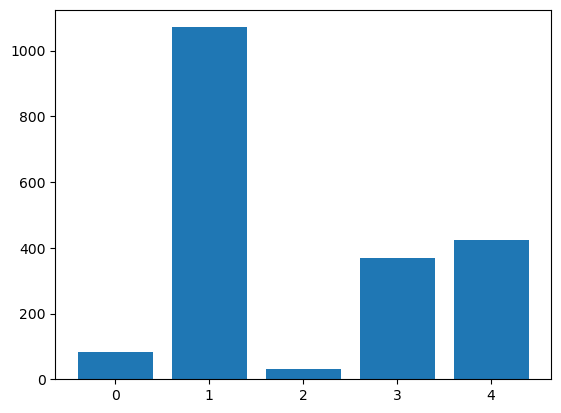

In [105]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot

# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [106]:
X_data= pd.concat([X_test_all, X_train_all], axis= 0)
X_data

,happy,loneliness,financial,general_health,living_No con pareja,...,prov_Málaga,activity_Trabaja por cuenta ajena,"pchild_Sí, todos",prov_Murcia,int_tablet_Sí
0,0.67,0.67,1,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.67,0.67,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0
2,0.67,1.00,0,0.5,0.0,...,0.0,0.0,1.0,1.0,0.0
3,0.67,0.67,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
4,0.67,0.67,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1381,0.33,0.67,0,0.5,0.0,...,0.0,0.0,0.0,1.0,0.0
1382,0.67,0.67,1,0.5,0.0,...,0.0,0.0,1.0,0.0,1.0
1383,0.67,0.67,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1384,1.00,1.00,1,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0


Class=4, n=1071 (20.000%)
Class=1, n=1071 (20.000%)
Class=3, n=1071 (20.000%)
Class=0, n=1071 (20.000%)
Class=2, n=1071 (20.000%)


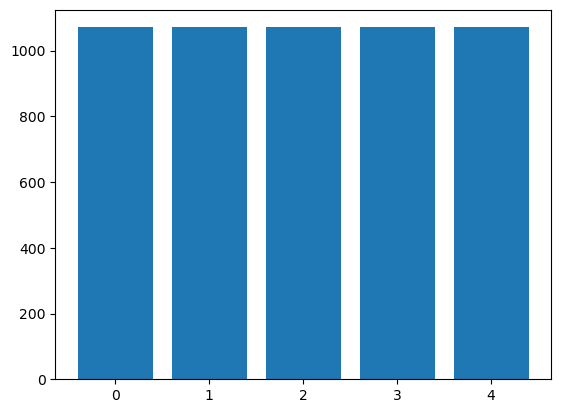

In [107]:
# oversampling a multi-class classification dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# transform the dataset
oversample = SMOTE()
X_data, y = oversample.fit_resample(X_data, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
    
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Source: https://machinelearningmastery.com/multi-class-imbalanced-classification/ 

### Re-FIT Classifiers with the oversampled train set

In [108]:
# Split the oversampled data into training and testing sets
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(
    X_data, y, test_size=0.3, random_state=42)

In [109]:
def model_test_classification_3(modellist):
    
    for model in modellist:
        
        model.fit(X_train_oversampled, y_train_oversampled)
        
        # Training Data
        train_predictions = model.predict(X_train_oversampled)
        # Accuracy
        train_accuracy = round(accuracy_score(y_train_oversampled, train_predictions), 2)
        # Classification Report
        train_classification_report = classification_report(y_train_oversampled, train_predictions)
        # Confusion Matrix
        train_confusion_matrix = confusion_matrix(y_train_oversampled, train_predictions)
        
        # Test Data
        test_predictions = model.predict(X_test_oversampled)
        # Accuracy
        test_accuracy = round(accuracy_score(y_test_oversampled, test_predictions), 2)
        # Classification Report
        test_classification_report = classification_report(y_test_oversampled, test_predictions)
        # Confusion Matrix
        test_confusion_matrix = confusion_matrix(y_test_oversampled, test_predictions)
        
        display(model)
        display(pd.DataFrame({'ValType': ['Train', 'Test'], 'Accuracy': [train_accuracy, test_accuracy]}))
        print("Training Classification Report:\n", train_classification_report)
        print("Training Confusion Matrix:\n", train_confusion_matrix)
        print("\nTesting Classification Report:\n", test_classification_report)
        print("Testing Confusion Matrix:\n", test_confusion_matrix)

In [110]:
%%time
model_test_classification_3(modelist)

RandomForestClassifier(max_depth=5, min_samples_leaf=20, min_samples_split=20)

,ValType,Accuracy
0,Train,0.63
1,Test,0.56


Training Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73       757
           1       0.55      0.74      0.63       730
           2       0.63      0.98      0.77       765
           3       0.74      0.28      0.41       738
           4       0.59      0.38      0.47       758

    accuracy                           0.63      3748
   macro avg       0.65      0.63      0.60      3748
weighted avg       0.65      0.63      0.60      3748

Training Confusion Matrix:
 [[572  34 118   9  24]
 [ 23 543  70  25  69]
 [  8   5 747   0   5]
 [109 190 126 210 103]
 [ 94 211 123  39 291]]

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       314
           1       0.51      0.68      0.58       341
           2       0.57      0.95      0.71       306
           3       0.65      0.18      0.28       333
           4       0.45      0

GradientBoostingClassifier()

,ValType,Accuracy
0,Train,0.79
1,Test,0.66


Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       757
           1       0.62      0.91      0.74       730
           2       0.94      0.98      0.96       765
           3       0.81      0.57      0.67       738
           4       0.76      0.55      0.64       758

    accuracy                           0.79      3748
   macro avg       0.80      0.79      0.78      3748
weighted avg       0.80      0.79      0.78      3748

Training Confusion Matrix:
 [[696  35   6   6  14]
 [  4 667   1  22  36]
 [  2  10 749   0   4]
 [ 46 170  21 424  77]
 [ 54 200  17  72 415]]

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80       314
           1       0.56      0.83      0.67       341
           2       0.84      0.95      0.89       306
           3       0.61      0.36      0.45       333
           4       0.52      0

LogisticRegression()

,ValType,Accuracy
0,Train,0.35
1,Test,0.34


Training Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.39      0.36       757
           1       0.33      0.32      0.32       730
           2       0.44      0.64      0.52       765
           3       0.31      0.23      0.27       738
           4       0.25      0.17      0.20       758

    accuracy                           0.35      3748
   macro avg       0.33      0.35      0.34      3748
weighted avg       0.33      0.35      0.34      3748

Training Confusion Matrix:
 [[294  99 154  92 118]
 [123 231 151 130  95]
 [ 79  47 489  49 101]
 [179 157 151 172  79]
 [180 158 177 114 129]]

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.47      0.41       314
           1       0.33      0.31      0.32       341
           2       0.40      0.59      0.48       306
           3       0.32      0.22      0.26       333
           4       0.16      0

SVC()

,ValType,Accuracy
0,Train,0.77
1,Test,0.67


Training Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.87       757
           1       0.70      0.61      0.66       730
           2       0.92      1.00      0.96       765
           3       0.68      0.70      0.69       738
           4       0.72      0.61      0.66       758

    accuracy                           0.77      3748
   macro avg       0.77      0.77      0.77      3748
weighted avg       0.77      0.77      0.77      3748

Training Confusion Matrix:
 [[713  10   4  10  20]
 [ 44 448  18 125  95]
 [  1   0 764   0   0]
 [ 41  87  29 513  68]
 [ 74  91  19 111 463]]

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       314
           1       0.58      0.50      0.54       341
           2       0.85      1.00      0.92       306
           3       0.57      0.55      0.56       333
           4       0.51      0

KNeighborsClassifier()

,ValType,Accuracy
0,Train,0.79
1,Test,0.68


Training Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       757
           1       0.75      0.39      0.52       730
           2       0.89      0.99      0.94       765
           3       0.74      0.82      0.78       738
           4       0.80      0.74      0.77       758

    accuracy                           0.79      3748
   macro avg       0.79      0.79      0.77      3748
weighted avg       0.79      0.79      0.77      3748

Training Confusion Matrix:
 [[748   1   1   3   4]
 [134 286  48 145 117]
 [  5   0 760   0   0]
 [ 48  41  21 604  24]
 [ 55  51  26  63 563]]

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.97      0.80       314
           1       0.58      0.26      0.35       341
           2       0.81      0.99      0.89       306
           3       0.64      0.68      0.66       333
           4       0.62      0

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

,ValType,Accuracy
0,Train,0.59
1,Test,0.50


Training Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65       757
           1       0.51      0.58      0.54       730
           2       0.78      0.91      0.84       765
           3       0.43      0.43      0.43       738
           4       0.52      0.38      0.44       758

    accuracy                           0.59      3748
   macro avg       0.58      0.59      0.58      3748
weighted avg       0.58      0.59      0.58      3748

Training Confusion Matrix:
 [[483  94  43  83  54]
 [ 56 426  40 115  93]
 [ 12   5 693  46   9]
 [108 147  62 316 105]
 [ 79 168  54 169 288]]

Testing Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.56      0.57       314
           1       0.45      0.54      0.49       341
           2       0.67      0.84      0.75       306
           3       0.36      0.28      0.32       333
           4       0.37      0

#### RandomForestClassifier:
- Before SMOTE:
    - Train Accuracy: 0.61, Test Accuracy: 0.61
    - Precision, Recall, and F1-score for each class are relatively balanced.
- After SMOTE:
    - Train Accuracy: 0.63, Test Accuracy: 0.55
    - There's a decrease in precision, recall, and F1-score for class 1. It indicates that the model is not performing well in predicting this class after oversampling. There's also a decrease in precision for class 4.
- Comparison: SMOTE caused a decrease in test accuracy. The model may have become too sensitive to the minority class.

#### GradientBoostingClassifier:
- Before SMOTE:
    - Train Accuracy: 0.77, Test Accuracy: 0.64
    - Precision, Recall, and F1-score are relatively balanced.
- After SMOTE:
    - Train Accuracy: 0.79, Test Accuracy: 0.66
    - Precision, recall, and F1-score improved for most classes, indicating better performance after oversampling
- Comparison: SMOTE improved both train and test accuracies, indicating a positive impact on the model's performance.

#### LogisticRegression:
- Before SMOTE:
    - Train Accuracy: 0.62, Test Accuracy: 0.62
    - Precision, Recall, and F1-score are relatively balanced but generally lower compared to other models.
- After SMOTE:
    - Train Accuracy: 0.35, Test Accuracy: 0.34
    - There's a significant decrease in precision, recall, and F1-score for most classes, indicating that logistic regression may not be well-suited for oversampled data.
- Comparison: There was a significant decrease in accuracy after applying SMOTE, suggesting that logistic regression might not be well-suited for the oversampled data.

#### SVC:
- Before SMOTE:
    - Train Accuracy: 0.65, Test Accuracy: 0.58
    - Precision, Recall, and F1-score are relatively balanced.

- After SMOTE:
    - Train Accuracy: 0.77, Test Accuracy: 0.67
    - Precision, recall, and F1-score improved for most classes, indicating better performance after oversampling.
- Comparison: SMOTE significantly improved the accuracy of the Support Vector Classifier on both training and testing sets.

#### KNeighborsClassifier:
- Before SMOTE:
    - Train Accuracy: 0.64, Test Accuracy: 0.56
    - Precision, Recall, and F1-score for each class are relatively balanced.
- After SMOTE:
    - Train Accuracy: 0.79, Test Accuracy: 0.68
    - Precision, recall, and F1-score improved for most classes, indicating better performance after oversampling.
- Comparison: SMOTE led to a substantial improvement in accuracy for the KNeighborsClassifier.

#### DecisionTreeClassifier:
- Before SMOTE:
    - Train Accuracy: 0.66, Test Accuracy: 0.62
    - Precision, Recall, and F1-score for each class are relatively balanced.
- After SMOTE:
    - Train Accuracy: 0.60, Test Accuracy: 0.48
    - There's a decrease in precision, recall, and F1-score for most classes, indicating a decline in performance after oversampling.
- Comparison: SMOTE resulted in a decrease in accuracy for the DecisionTreeClassifier, suggesting that the model might be overfitting or becoming too sensitive to the minority class.

#### Conclusion:
- SMOTE had mixed effects on different models.
- RandomForest and LogisticRegression did not benefit from SMOTE and, in fact, showed a decrease in performance.
- DecisionTreeClassifier showed a decrease in accuracy after applying SMOTE.
- GradientBoosting, SVC, and KNeighborsClassifier demonstrated improved accuracy, precision, recall, and F1-score after oversampling and are the best performers with this dataset.


# Cross-validation?